In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np

vantage1 = pd.read_csv('/content/drive/My Drive/VantageAgora/Sample1.CSV', encoding = "ISO-8859-1")
vantage2 = pd.read_csv('/content/drive/My Drive/VantageAgora/Sample2.CSV', encoding = "ISO-8859-1")

print(vantage1.shape)
print(vantage2.shape)

#print(vantage1.describe())
#print(vantage2.describe())

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,7,32,33,42,63,66,72,76,128,134,135) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(12417, 147)
(44643, 146)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,7,20,32,33,63,91,125,126,127,128,130,133,136,139,145) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


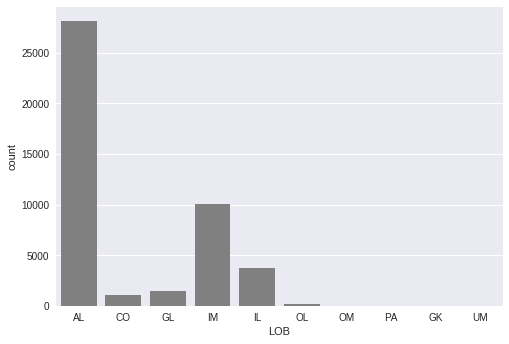

In [0]:
useful_cols1 = ['CLMNO', 'OCCURRENCE', 'CLNTNO', 'NET_INDEMNITY_RESERVE', 'NET_EXPENSE_RESERVE', 'CARRIERCLMNO', 'CLIENTSCLMNO', 'LOSSDATE', 'STATUS', 'OPENDATE', 'CLOSEDATE', 'REOPENDATE', 'LOB', 'COVERAGE', 'STATE', 'DESCR', 'DESCR2', 'INJURIES', 'IPOLNO', 'IEFFDT', 'IEXPDT', 'CCITY', 'CSTATE',  'CGENDER', 'LOCDESC', 'LOC', 'LOCNM', 'LOCCITY', 'LOCSTATE', 'LOCZIP', 'VINNO', 'AUTOMAKE', 'VEHYEAR', 'DRIVERAGE', 'LICSTATE', 'DOB', 'INDRESERVES', 'MEDRESERVES', 'EXPRESERVES', 'TOTALRESERVES', 'INDPAID', 'MEDPAID', 'EXPPAID', 'YORKPAID', 'TOTALPAID', 'RECOVERIES', 'INCURRED', 'AWM_Cause_Code', 'Deductible']
#the second set includes the non-null CAUSE column and does not include Deductible (that column does not exist in the second dataset)
useful_cols2 = ['CLMNO', 'OCCURRENCE', 'CLNTNO', 'NET_INDEMNITY_RESERVE', 'NET_EXPENSE_RESERVE', 'CARRIERCLMNO', 'CLIENTSCLMNO', 'LOSSDATE', 'STATUS', 'OPENDATE', 'CLOSEDATE', 'REOPENDATE', 'LOB', 'COVERAGE', 'STATE', 'DESCR', 'DESCR2', 'INJURIES', 'IPOLNO', 'IEFFDT', 'IEXPDT', 'CCITY', 'CSTATE',  'CGENDER', 'LOCDESC', 'LOC', 'LOCNM', 'LOCCITY', 'LOCSTATE', 'LOCZIP', 'VINNO', 'AUTOMAKE', 'VEHYEAR', 'DRIVERAGE', 'LICSTATE', 'DOB', 'INDRESERVES', 'MEDRESERVES', 'EXPRESERVES', 'TOTALRESERVES', 'INDPAID', 'MEDPAID', 'EXPPAID', 'YORKPAID', 'TOTALPAID', 'RECOVERIES', 'INCURRED', 'AWM_Cause_Code', 'CAUSE']
vantage1 = vantage1[useful_cols1]
vantage2 = vantage2[useful_cols2]
vantage1.drop_duplicates(keep='first', inplace=True)
vantage2.drop_duplicates(keep='first', inplace=True)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.countplot(vantage2['LOB'], color='gray')

In [0]:
vantage2 = vantage2[vantage2['LOB'] == 'AL']

In [0]:
vantage2['LOSSDATE'] = pd.to_datetime(vantage2['LOSSDATE'], format='%Y%m%d')
vantage2['LOSSDATE'][:10]

0    2012-06-11
1    2012-06-15
2    2012-06-15
3    2012-06-13
4    2012-06-11
5    2012-04-02
6    2012-06-06
7    2012-06-08
8    2012-06-14
10   2012-06-18
Name: LOSSDATE, dtype: datetime64[ns]

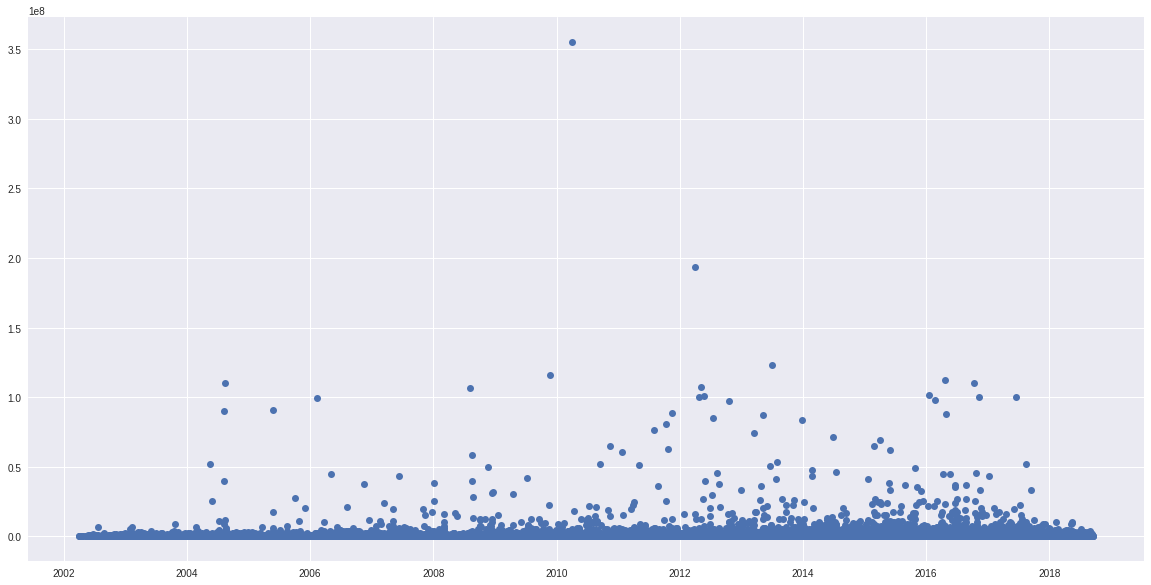

In [0]:
import matplotlib.dates as matdate
plt.figure(figsize=(20,10))
list_of_dates = list(vantage2['LOSSDATE'])
dates = matdate.date2num(list_of_dates)
values = list(vantage2['INCURRED'])
plt.plot_date(dates, values)

To get monthly mean, median, count

In [0]:
data = {'LOSSDATE': list_of_dates, 'INCURRED': values}
frame = pd.DataFrame(data)
frame.set_index('LOSSDATE',inplace=True)
mean_month = frame.resample('M',how='mean')
median_month = frame.resample('M',how='median')
count_month = frame.resample('M',how={'INCURRED':'count'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


Monthly stuff after 2015

In [0]:
frame_2015 = frame['2015':]
mean_month_2015 = frame_2015.resample('M',how='mean')
median_month_2015 = frame_2015.resample('M',how='median')
count_month_2015 = frame_2015.resample('M',how={'INCURRED':'count'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  after removing the cwd from sys.path.


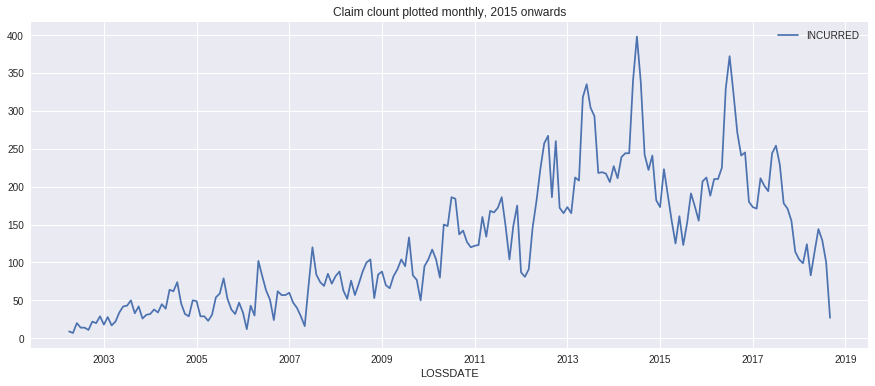

In [0]:
count_month_2015.plot(figsize=(15, 6))
plt.title("Claim clount plotted monthly, 2015 onwards")
plt.show()

Weekly for more granularity

In [0]:
frame_2016 = frame['2016':]
mean_week_2016 = frame_2016.resample('W',how='mean')
median_week_2016 = frame_2016.resample('W',how='median')
count_week_2016 = frame_2016.resample('W',how={'INCURRED':'count'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  after removing the cwd from sys.path.


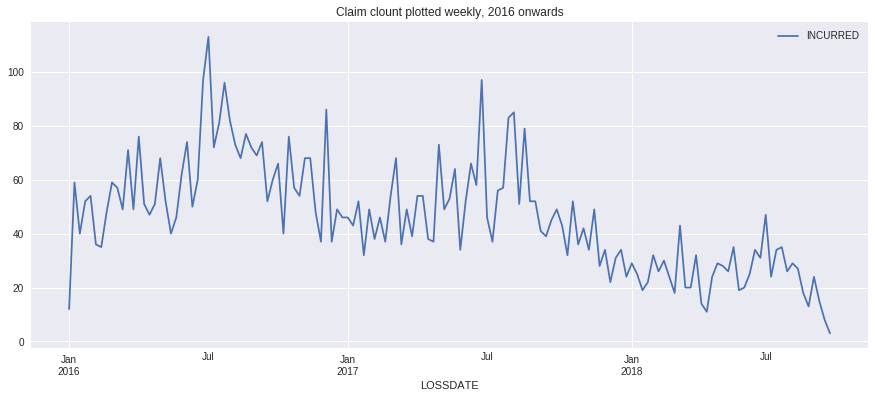

In [0]:
count_week_2016.plot(figsize=(15, 6))
plt.title("Claim clount plotted weekly, 2016 onwards")
plt.show()

In [0]:
#age_list = [int(x) for x in age_list if (isinstance(x,str) and x.isdigit()) or (isinstance(x,int) and x != 0)]
veh_year = list(vantage2['VEHYEAR'])
veh_year_list = []
for x in veh_year:
  if (isinstance(x,str) and x.isdigit()) or (isinstance(x,int) and x != 0):
    veh_year_list.append(int(x))
  else:
    veh_year_list.append(-1)
    #need to keep them aligned

In [0]:

data_driver = {'LOSSDATE': list_of_dates,'INCURRED': values, 'VEHYEAR': veh_year_list}
data_driver = pd.DataFrame(data_driver)

data_2000 = data_driver.loc[(data_driver['VEHYEAR'] >= 0) & (data_driver['VEHYEAR'] <= 2000)]
data_00_08 = data_driver.loc[(data_driver['VEHYEAR'] > 2000) & (data_driver['VEHYEAR'] <= 2008)]
data_08_15 = data_driver.loc[(data_driver['VEHYEAR'] > 2008) & (data_driver['VEHYEAR'] <= 2015)]
data_over_15 = data_driver.loc[data_driver['VEHYEAR'] > 2015]

data_2000.set_index('LOSSDATE',inplace=True)
data_00_08.set_index('LOSSDATE',inplace=True)
data_08_15.set_index('LOSSDATE',inplace=True)
data_over_15.set_index('LOSSDATE',inplace=True)

data_2000 = data_2000.sort_index()
data_00_08 = data_00_08.sort_index()
data_08_15 = data_08_15.sort_index()
data_over_15 = data_over_15.sort_index()

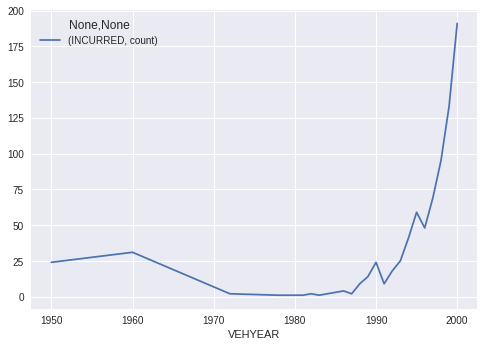

In [0]:
to_plot = data_2000.groupby(['VEHYEAR']).agg(['count'])
to_plot.plot()

In [0]:
print(data_2000.shape)
print(data_00_08.shape)
print(data_08_15.shape)
print(data_over_15.shape)

ratio_2000 = len(data_00_08)/len(data_2000)
ratio_00_08 = 1
ratio_08_15 = len(data_00_08)/len(data_08_15)
ratio_over_15 = len(data_00_08)/len(data_over_15)

(7038, 2)
(10589, 2)
(5234, 2)
(979, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Claim clount plotted for vehyear up to 2000')

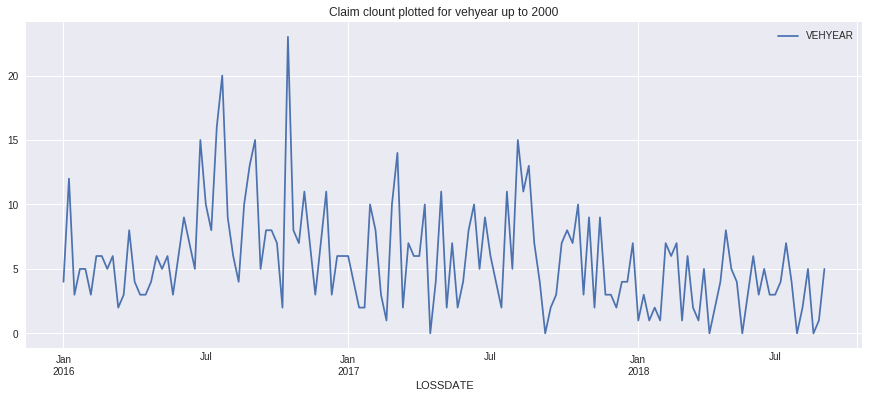

In [0]:
data_2000 = data_2000['2016':]
mean_week_2016 = data_2000.resample('W',how='mean')
median_week_2016 = data_2000.resample('W',how='median')
count_week_2016_2000 = data_2000.resample('W',how={'VEHYEAR':'count'})
count_week_2016_2000.plot(figsize=(15, 6))
plt.title("Claim clount plotted for vehyear up to 2000")
#plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Claim clount plotted for vehyear 2000 to 2008')

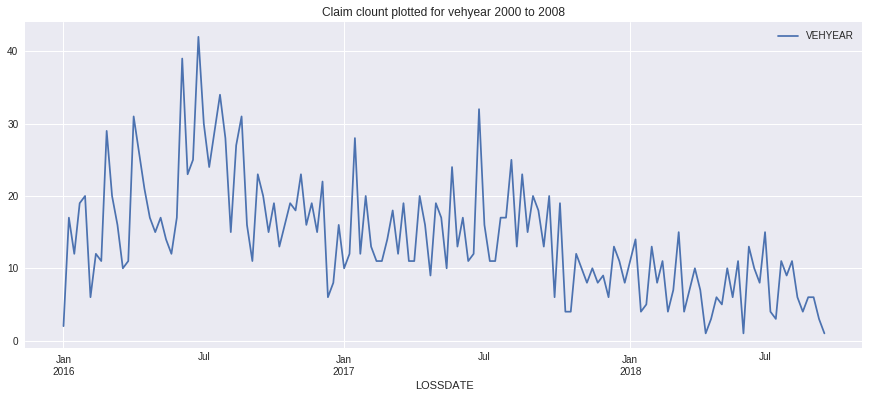

In [0]:
data_00_08 = data_00_08['2016':]
mean_week_2016 = data_00_08.resample('W',how='mean')
median_week_2016 = data_00_08.resample('W',how='median')
count_week_2016_00_08 = data_00_08.resample('W',how={'VEHYEAR':'count'})
count_week_2016_00_08.plot(figsize=(15, 6))
plt.title("Claim clount plotted for vehyear 2000 to 2008")
#plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Claim clount plotted for vehyear 2008 to 2015')

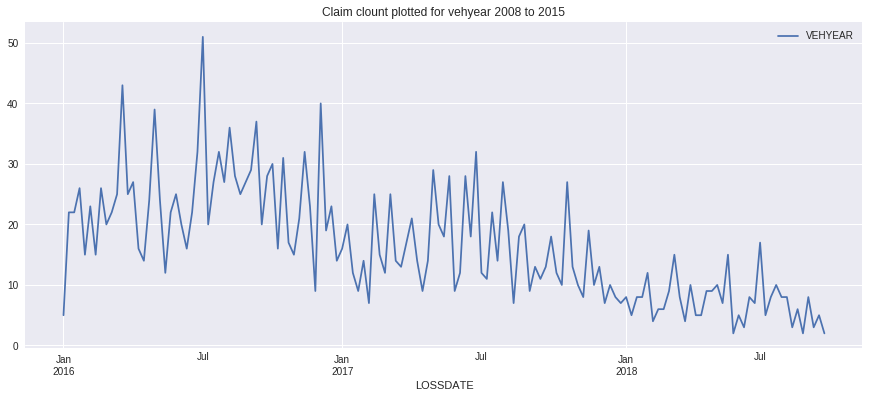

In [0]:
data_08_15 = data_08_15['2016':]
mean_week_2016 = data_08_15.resample('W',how='mean')
median_week_2016 = data_08_15.resample('W',how='median')
count_week_2016_08_15 = data_08_15.resample('W',how={'VEHYEAR':'count'})
count_week_2016_08_15.plot(figsize=(15, 6))
plt.title("Claim clount plotted for vehyear 2008 to 2015")
#plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Claim clount plotted for vehyear over 2015')

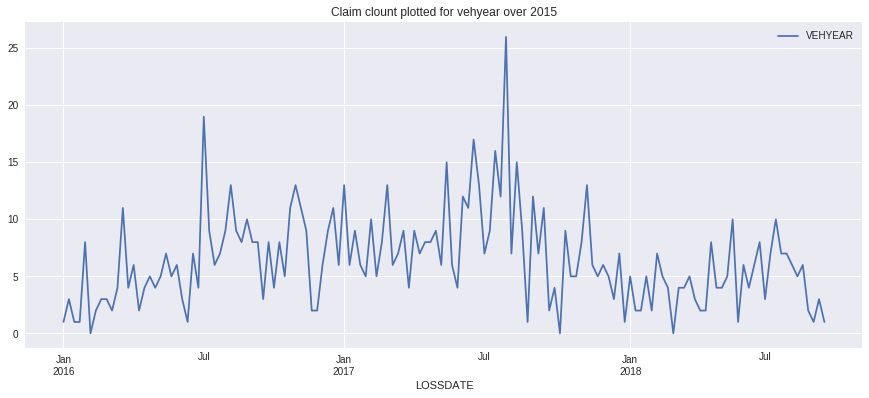

In [0]:
data_over_15 = data_over_15['2016':]
mean_week_2016 = data_over_15.resample('W',how='mean')
median_week_2016 = data_over_15.resample('W',how='median')
count_week_2016_over_15 = data_over_15.resample('W',how={'VEHYEAR':'count'})
count_week_2016_over_15.plot(figsize=(15, 6))
plt.title("Claim clount plotted for vehyear over 2015")


In [0]:
col2000 = count_week_2016_2000
col0008 = count_week_2016_00_08
col0815 = count_week_2016_08_15
colover15 = count_week_2016_over_15
count_week_2016_over_15['Count_till_2000'] = col2000
count_week_2016_over_15['Count_2000_2008'] = col0008
count_week_2016_over_15['Count_2008_2015'] = col0815
count_week_2016_over_15.columns = ['Count_over_2015','Count_till_2000','Count_2000_2008','Count_2008_2015']
count_week_2016_over_15.head(10)

Count_over_2015  Count_till_2000  Count_2000_2008  Count_2008_2015
LOSSDATE                                                                      
2016-01-03                1              4.0                2                5
2016-01-10                3             12.0               17               22
2016-01-17                1              3.0               12               22
2016-01-24                1              5.0               19               26
2016-01-31                8              5.0               20               15
2016-02-07                0              3.0                6               23
2016-02-14                2              6.0               12               15
2016-02-21                3              6.0               11               26
2016-02-28                3              5.0               29               20
2016-03-06                2              6.0               20               22

Text(0.5, 1.0, 'Claim clount plotted for vehyear from 2016')

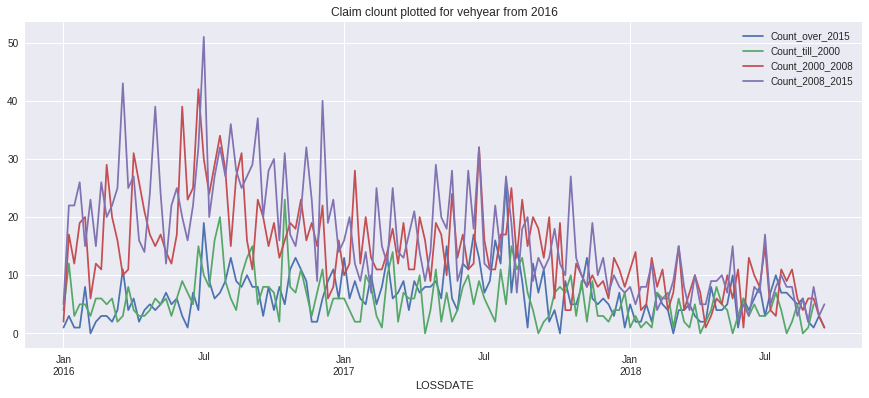

In [0]:
count_week_2016_over_15.plot(figsize=(15, 6))
plt.title("Claim clount plotted for vehyear from 2016")

Text(0.5, 1.0, 'Claim clount plotted for vehyear from 2016, normalized')

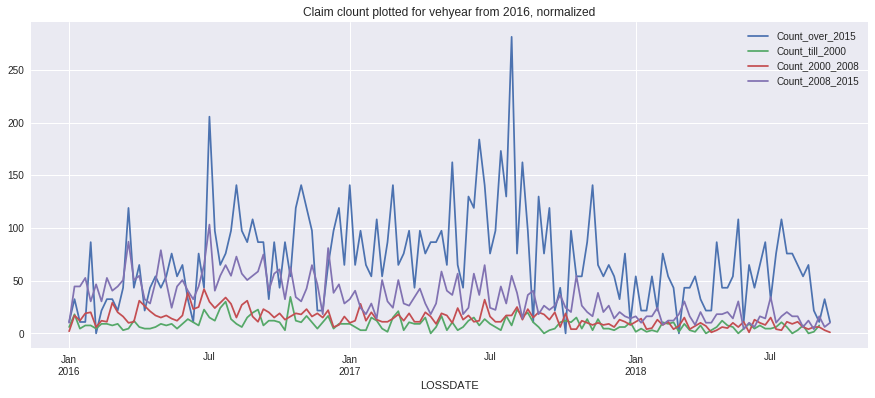

In [0]:
#now normalize based on population
count_week_2016_over_15['Count_till_2000'] = count_week_2016_over_15['Count_till_2000'].multiply(ratio_2000)
count_week_2016_over_15['Count_2000_2008'] = count_week_2016_over_15['Count_2000_2008'].multiply(ratio_00_08)
count_week_2016_over_15['Count_2008_2015'] = count_week_2016_over_15['Count_2008_2015'].multiply(ratio_08_15)
count_week_2016_over_15['Count_over_2015'] = count_week_2016_over_15['Count_over_2015'].multiply(ratio_over_15)

count_week_2016_over_15.plot(figsize=(15, 6))
plt.title("Claim clount plotted for vehyear from 2016, normalized")

In [0]:
count_week_2016_over_15.head(10)

Count_over_2015  Count_till_2000  Count_2000_2008  Count_2008_2015
LOSSDATE                                                                      
2016-01-03        10.816139         6.018187                2        10.115590
2016-01-10        32.448417        18.054561               17        44.508598
2016-01-17        10.816139         4.513640               12        44.508598
2016-01-24        10.816139         7.522734               19        52.601070
2016-01-31        86.529111         7.522734               20        30.346771
2016-02-07         0.000000         4.513640                6        46.531716
2016-02-14        21.632278         9.027280               12        30.346771
2016-02-21        32.448417         9.027280               11        52.601070
2016-02-28        32.448417         7.522734               29        40.462361
2016-03-06        21.632278         9.027280               20        44.508598

In [0]:
#age_list = [int(x) for x in age_list if (isinstance(x,str) and x.isdigit()) or (isinstance(x,int) and x != 0)]
driver = list(vantage2['DRIVERAGE'])
driverage = []
for x in driver:
  if (isinstance(x,str) and x.isdigit()) or (isinstance(x,int) and x != 0):
    driverage.append(int(x))
  else:
    driverage.append(-1)
    #need to keep them aligned

data_driver = {'LOSSDATE': list_of_dates, 'INCURRED': values, 'DRIVERAGE': driverage}
data_driver = pd.DataFrame(data_driver)
#df.loc[df['column_name'] == some_value]
data_0_25 = data_driver.loc[(data_driver['DRIVERAGE'] >= 0) & (data_driver['DRIVERAGE'] <= 25)]
data_25_50 = data_driver.loc[(data_driver['DRIVERAGE'] > 25) & (data_driver['DRIVERAGE'] <= 50)]
data_over_50 = data_driver.loc[data_driver['DRIVERAGE'] > 50]

data_0_25.set_index('LOSSDATE',inplace=True)
data_25_50.set_index('LOSSDATE',inplace=True)
data_over_50.set_index('LOSSDATE',inplace=True)

data_0_25 = data_0_25.sort_index()
data_25_50 = data_25_50.sort_index()
data_over_50 = data_over_50.sort_index()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  after removing the cwd from sys.path.


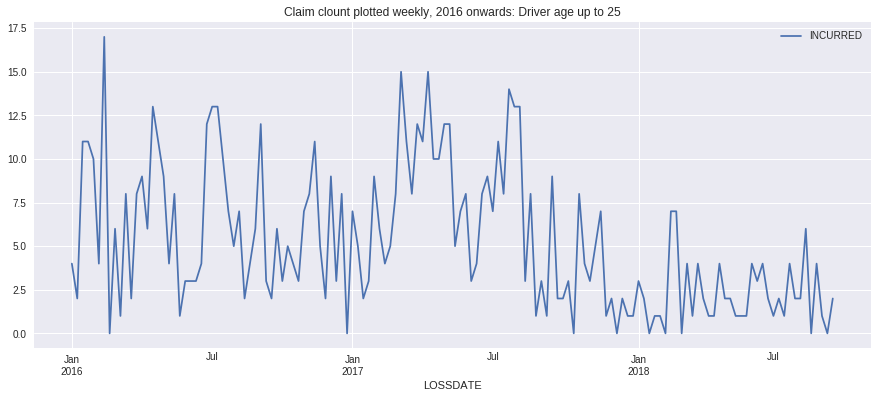

In [0]:
data025_2016 = data_0_25['2016':]
mean_week_2016 = data025_2016.resample('W',how='mean')
median_week_2016 = data025_2016.resample('W',how='median')
count_week_2016_025 = data025_2016.resample('W',how={'INCURRED':'count'})
count_week_2016_025.plot(figsize=(15, 6))
plt.title("Claim clount plotted weekly, 2016 onwards: Driver age up to 25")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  after removing the cwd from sys.path.


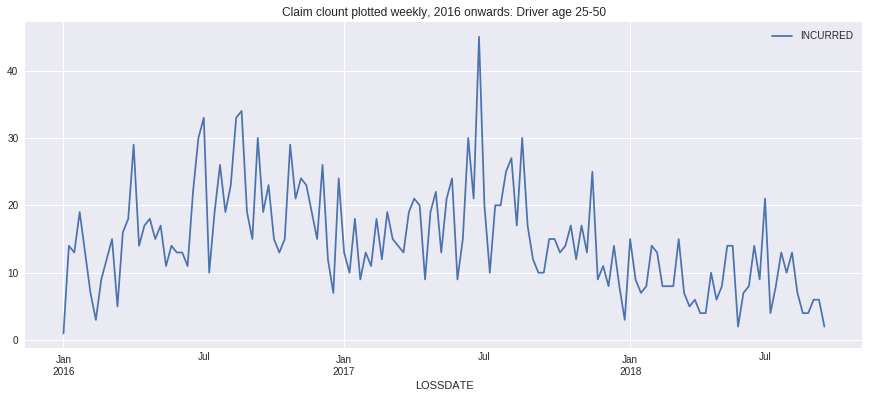

In [0]:
data2550_2016 = data_25_50['2016':]
mean_week_2016 = data2550_2016.resample('W',how='mean')
median_week_2016 = data2550_2016.resample('W',how='median')
count_week_2016_2550 = data2550_2016.resample('W',how={'INCURRED':'count'})
count_week_2016_2550.plot(figsize=(15, 6))
plt.title("Claim clount plotted weekly, 2016 onwards: Driver age 25-50")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  after removing the cwd from sys.path.


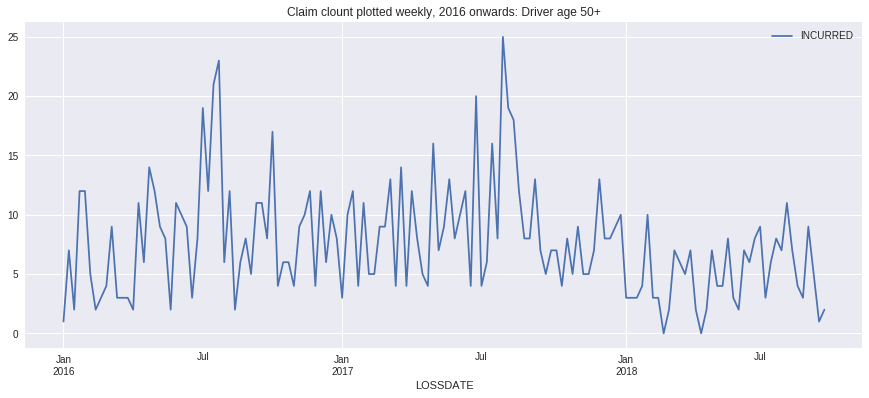

In [0]:
data_over_50_2016 = data_over_50['2016':]
mean_week_2016 = data_over_50_2016.resample('W',how='mean')
median_week_2016 = data_over_50_2016.resample('W',how='median')
count_week_2016_over50 = data_over_50_2016.resample('W',how={'INCURRED':'count'})
count_week_2016_over50.plot(figsize=(15, 6))
plt.title("Claim clount plotted weekly, 2016 onwards: Driver age 50+")
plt.show()

In [0]:
count50plus = len(data_over_50_2016)
count25plus = len(data2550_2016)
count0 = len(data025_2016)
print(count0)
print(count25plus)
print(count50plus)

mult0 = count25plus/count0
mult50 = count25plus/count50plus

752
2101
1092


In [0]:
col2550 = count_week_2016_2550
colover50 = count_week_2016_over50[:-1]
count_week_2016_025['INCURRED2550'] = list(col2550['INCURRED'])
count_week_2016_025['INCURREDOVER50'] = list(colover50['INCURRED'])
count_week_2016_025.head(10)

INCURRED  INCURRED2550  INCURREDOVER50
LOSSDATE                                          
2016-01-03         4             1               1
2016-01-10         2            14               7
2016-01-17        11            13               2
2016-01-24        11            19              12
2016-01-31        10            13              12
2016-02-07         4             7               5
2016-02-14        17             3               2
2016-02-21         0             9               3
2016-02-28         6            12               4
2016-03-06         1            15               9

In [0]:
#print(len(col2550))
#print(len(colover50))
print(len(count_week_2016_025))
col2550.tail(10)

142


INCURRED
LOSSDATE            
2018-07-15         8
2018-07-22        13
2018-07-29        10
2018-08-05        13
2018-08-12         7
2018-08-19         4
2018-08-26         4
2018-09-02         6
2018-09-09         6
2018-09-16         2

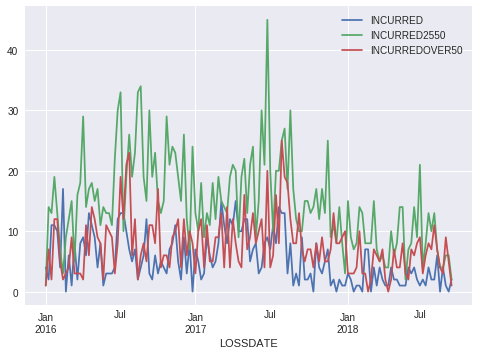

In [0]:
count_week_2016_025.plot()

In [0]:
#now with proportions taken into account
count_week_2016_025['INCURRED'] = count_week_2016_025['INCURRED'].multiply(mult0)
count_week_2016_025['INCURREDOVER50'] = count_week_2016_025['INCURREDOVER50'].multiply(mult50)

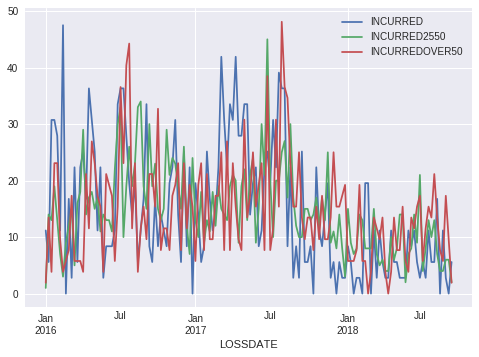

In [0]:
count_week_2016_025.plot()

In [0]:
state_list = ['AK','AL','AR','AZ','CA','CO','CT','DE','FL','GA','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VA','VT','WA','WI','WV','WY']
big_claim_states = ['CA', 'NY', 'TX', 'FL', 'PA', 'VA', 'MI', 'NJ']
small_claim_states = list(set(state_list)-set(big_claim_states))

In [0]:
data = {'LOSSDATE': list_of_dates, 'INCURRED': values, 'LOCSTATE': list(vantage2['LOCSTATE'])}
frame = pd.DataFrame(data)
frame_big = frame.loc[frame['LOCSTATE'].isin(big_claim_states)]
frame_small = frame.loc[frame['LOCSTATE'].isin(small_claim_states)]
                                         
frame_big.set_index('LOSSDATE',inplace=True)
frame_small.set_index('LOSSDATE',inplace=True)

frame_big = frame_big.sort_index()
frame_small = frame_small.sort_index()

frame_big = frame_big['2016':]
frame_small = frame_small['2016':]

count_big = frame_big.resample('W', how={'INCURRED':'count'})
count_small = frame_small.resample('W', how={'INCURRED':'count'})
#df.loc[df['column_name'].isin(some_values)]
count_big.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  app.launch_new_instance()


INCURRED
LOSSDATE            
2016-01-03         7
2016-01-10        29
2016-01-17        29
2016-01-24        38
2016-01-31        29
2016-02-07        25
2016-02-14        24
2016-02-21        29
2016-02-28        32
2016-03-06        33

In [0]:
frame

INCURRED LOCSTATE   LOSSDATE
0        930924       FL 2012-06-11
1             0       FL 2012-06-15
2             0       FL 2012-06-15
3        471607       AZ 2012-06-13
4             0       NE 2012-06-11
5             0       CA 2012-04-02
6        863641       FL 2012-06-06
7        222955       IN 2012-06-08
8             0       IA 2012-06-14
9             0       NE 2012-06-18
10       750000       NJ 2012-06-12
11            0       NJ 2012-06-12
12       755510       NJ 2012-06-12
13       750000       NJ 2012-06-12
14       576288       NJ 2012-06-12
15       488245       MO 2012-06-16
16       470968       CA 2012-06-20
17            0       CA 2012-06-21
18            0       CA 2012-06-21
19            0       DE 2012-06-11
20       363900       OK 2012-06-19
21       189093       VA 2012-06-22
22       567775       VA 2012-06-22
23       565270       GA 2011-10-24
24      1344554       NJ 2012-01-30
25            0       CO 2011-12-02
26            0       CO 2011-12-02
27        74067       NY 2012-01-30
28       176803       GA 2011-08-12
29         7400       UT 2012-01-31
...         ...      ...        ...
28116    134552       KY 2013-10-22
28117     37560       CA 2013-10-20
28118         0       CA 2013-10-20
28119   1219430       NY 2013-10-17
28120         0       CA 2013-10-02
28121         0       CA 2013-08-30
28122     54389       FL 2013-10-22
28123    186556       FL 2013-10-20
28124    373101       FL 2013-10-20
28125    656349       VA 2013-10-10
28126    303254       CO 2013-10-19
28127    160338       CA 2013-10-21
28128     80000       CA 2013-09-21
28129         0       CA 2013-10-18
28130         0       NJ 2013-07-29
28131   1025256       NY 2013-09-30
28132         0       NY 2013-12-23
28133      1000       CO 2013-12-26
28134         0       FL 2013-12-06
28135      2100       FL 2013-12-27
28136   1038281       CO 2013-08-01
28137     69572       NC 2013-12-30
28138      1450       WA 2013-12-30
28139   3097124       WA 2013-12-30
28140    600119       WA 2013-12-30
28141   2718869       WA 2013-12-30
28142      1050       MS 2013-12-30
28143    279658       MS 2013-12-30
28144    919039       TX 2013-12-28
28145    511422       MD 2013-12-15

[28146 rows x 3 columns]

In [0]:
count_small.head(10)

INCURRED
LOSSDATE            
2016-01-03         5
2016-01-10        30
2016-01-17        11
2016-01-24        14
2016-01-31        25
2016-02-07        11
2016-02-14        11
2016-02-21        19
2016-02-28        26
2016-03-06        24

In [0]:
count_small['INCURRED_BIG'] = list(count_big['INCURRED'])

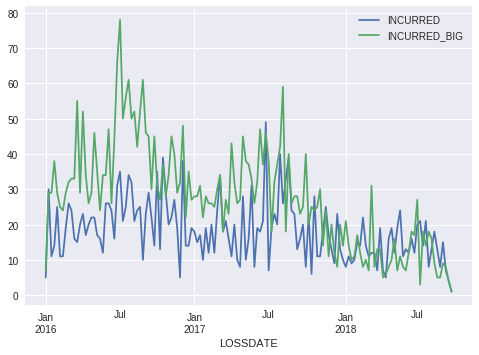

In [0]:
count_small.plot()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  import sys


            INCURRED
LOSSDATE            
2016-02-28         1
2016-03-06         0
2016-03-13         0
2016-03-20         0
2016-03-27         0


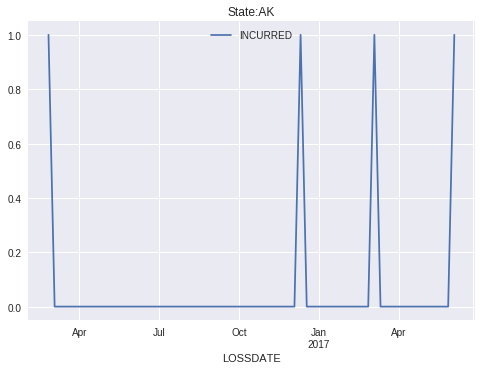

            INCURRED
LOSSDATE            
2016-01-03         1
2016-01-10         0
2016-01-17         0
2016-01-24         0
2016-01-31         0


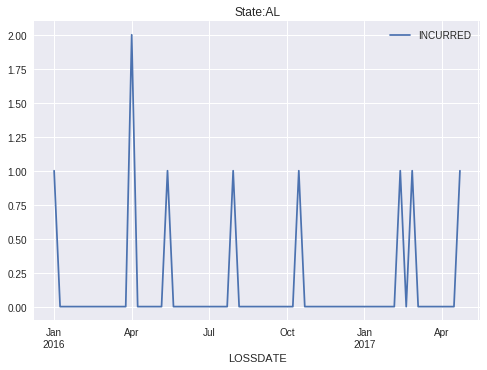

            INCURRED
LOSSDATE            
2016-01-10         1
2016-01-17         1
2016-01-24         0
2016-01-31         0
2016-02-07         0


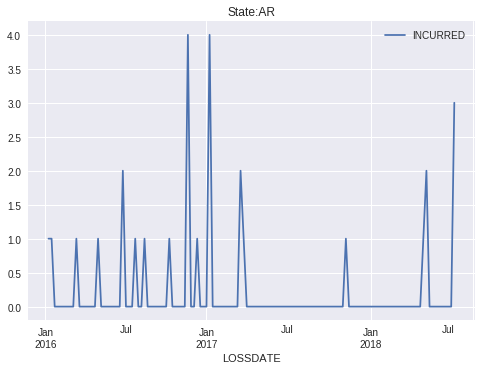

            INCURRED
LOSSDATE            
2016-01-24         1
2016-01-31         1
2016-02-07         0
2016-02-14         0
2016-02-21         0


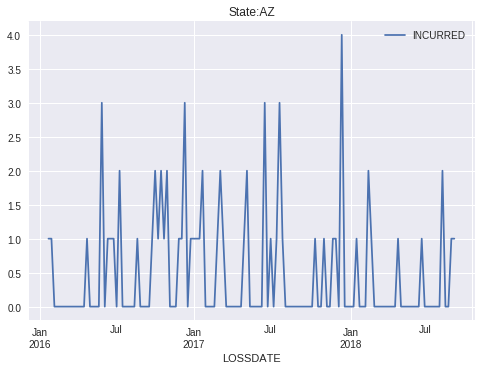

            INCURRED
LOSSDATE            
2016-01-03         1
2016-01-10         3
2016-01-17         5
2016-01-24         8
2016-01-31         6


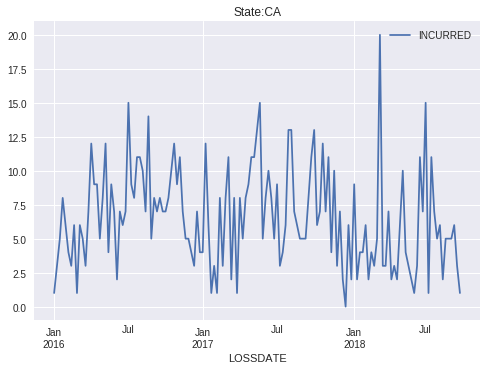

            INCURRED
LOSSDATE            
2016-01-24         1
2016-01-31         1
2016-02-07         0
2016-02-14         0
2016-02-21         0


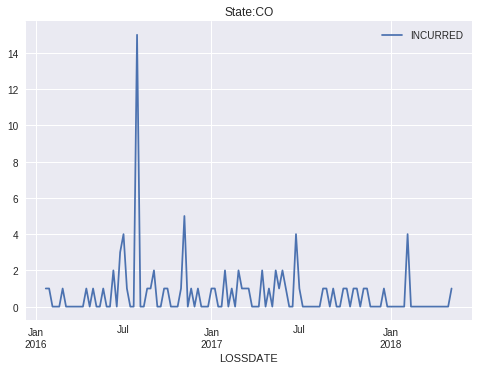

            INCURRED
LOSSDATE            
2016-01-17         1
2016-01-24         1
2016-01-31         2
2016-02-07         0
2016-02-14         1


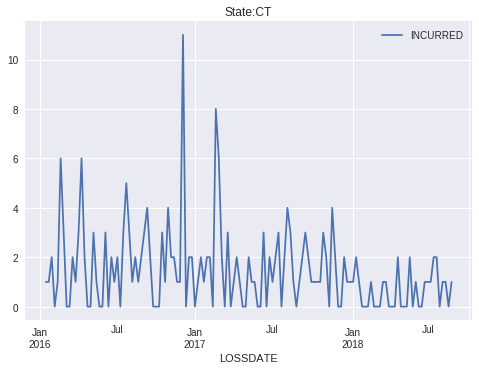

            INCURRED
LOSSDATE            
2016-01-10         2
2016-01-17         0
2016-01-24         0
2016-01-31         0
2016-02-07         0


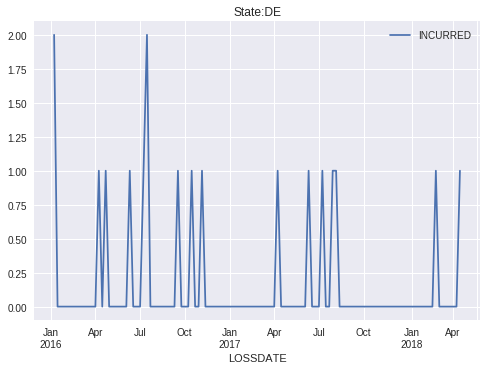

            INCURRED
LOSSDATE            
2016-01-03         1
2016-01-10         4
2016-01-17         6
2016-01-24         2
2016-01-31         2


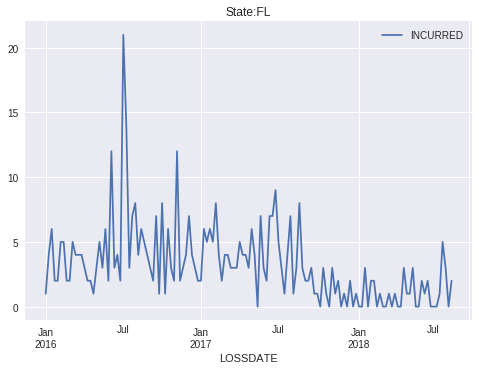

            INCURRED
LOSSDATE            
2016-01-10         1
2016-01-17         1
2016-01-24         0
2016-01-31         0
2016-02-07         0


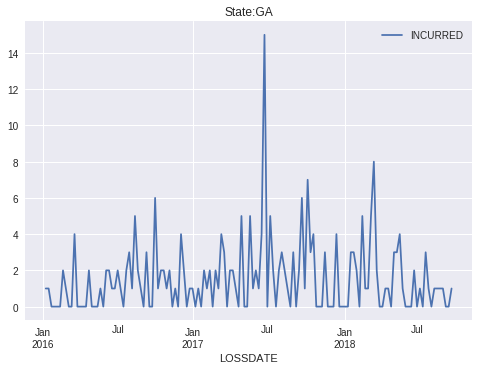

Empty DataFrame
Columns: [INCURRED]
Index: []
            INCURRED
LOSSDATE            
2016-01-24         1
2016-01-31         0
2016-02-07         0
2016-02-14         0
2016-02-21         0


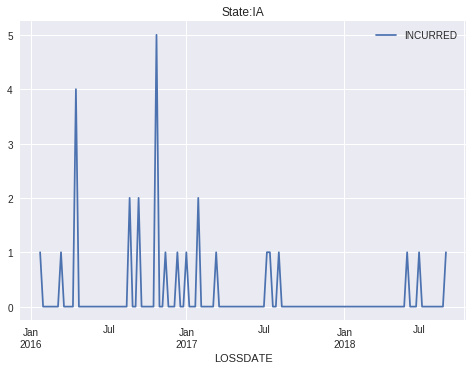

            INCURRED
LOSSDATE            
2016-10-16         1
2016-10-23         0
2016-10-30         0
2016-11-06         0
2016-11-13         0


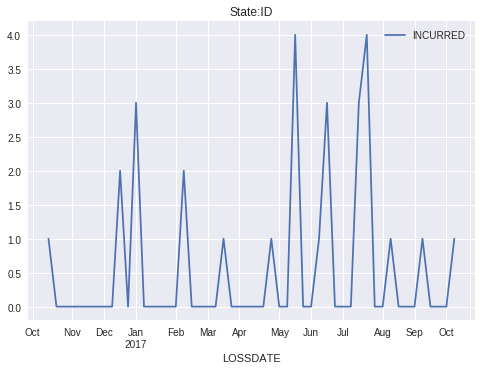

            INCURRED
LOSSDATE            
2016-01-03         1
2016-01-10         1
2016-01-17         1
2016-01-24         0
2016-01-31         1


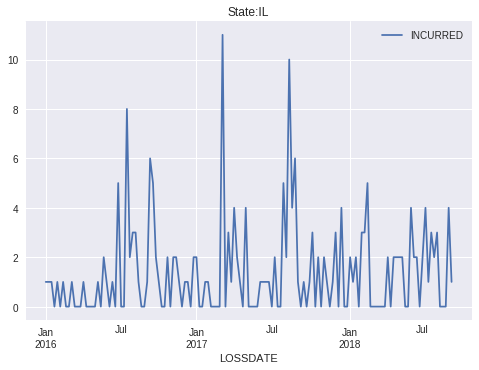

            INCURRED
LOSSDATE            
2016-01-31         1
2016-02-07         0
2016-02-14         0
2016-02-21         0
2016-02-28         0


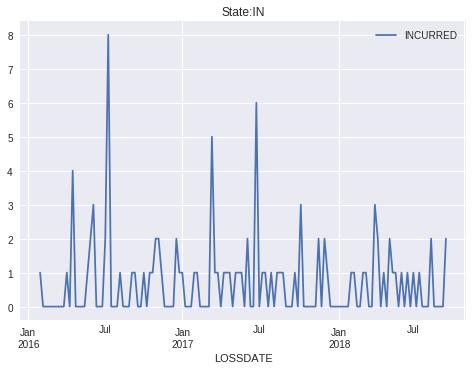

            INCURRED
LOSSDATE            
2016-01-03         1
2016-01-10         0
2016-01-17         0
2016-01-24         0
2016-01-31         0


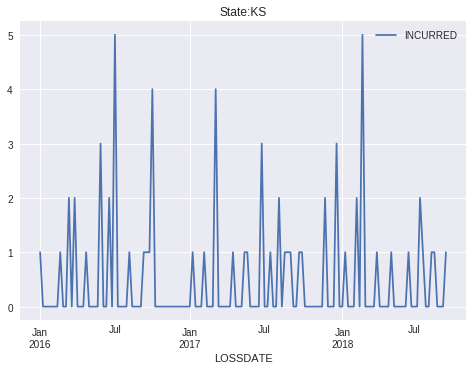

            INCURRED
LOSSDATE            
2016-01-10         1
2016-01-17         0
2016-01-24         1
2016-01-31         0
2016-02-07         0


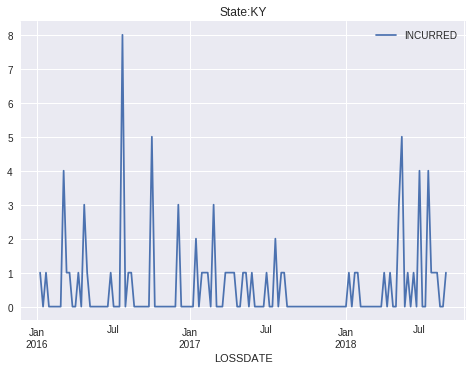

            INCURRED
LOSSDATE            
2016-01-10         1
2016-01-17         0
2016-01-24         0
2016-01-31         0
2016-02-07         0


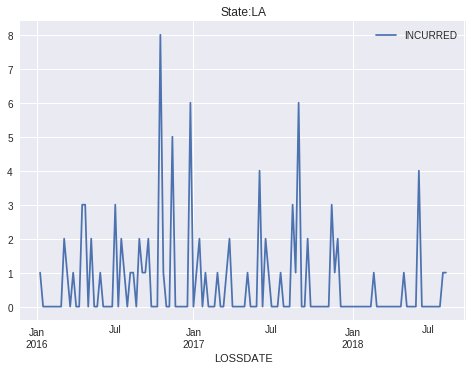

            INCURRED
LOSSDATE            
2016-01-03         1
2016-01-10         0
2016-01-17         0
2016-01-24         3
2016-01-31         3


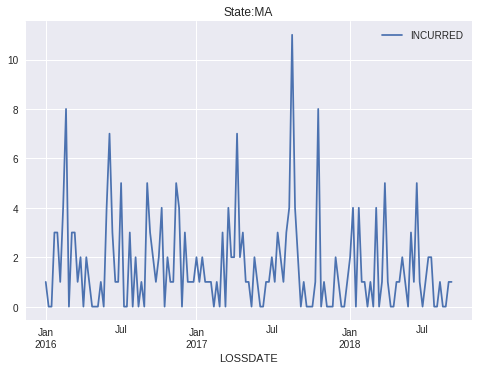

            INCURRED
LOSSDATE            
2016-01-17         2
2016-01-24         0
2016-01-31         3
2016-02-07         2
2016-02-14         1


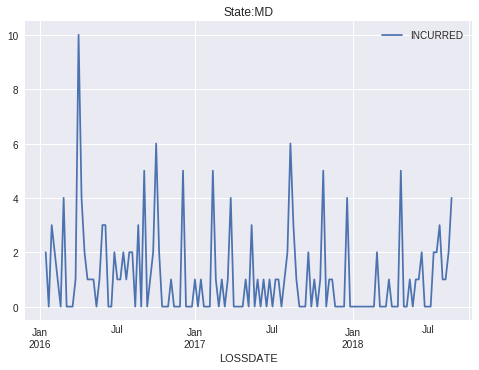

            INCURRED
LOSSDATE            
2017-04-09         1
2017-04-16         0
2017-04-23         1
2017-04-30         0
2017-05-07         0


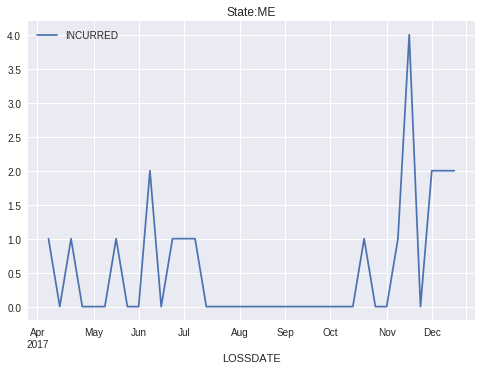

            INCURRED
LOSSDATE            
2016-01-10         6
2016-01-17         1
2016-01-24         7
2016-01-31         0
2016-02-07         1


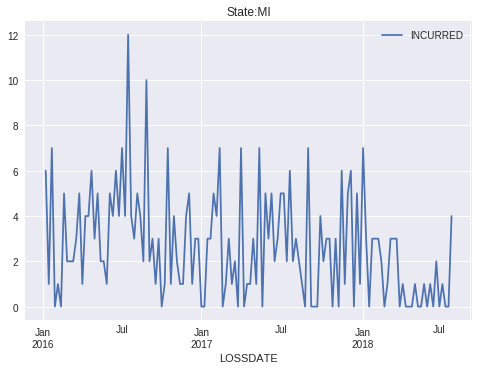

            INCURRED
LOSSDATE            
2016-01-10         2
2016-01-17         0
2016-01-24         0
2016-01-31         0
2016-02-07         0


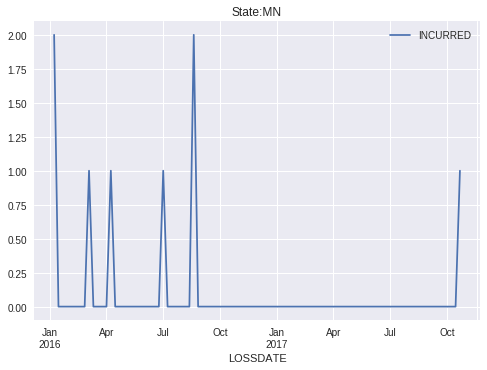

            INCURRED
LOSSDATE            
2016-01-10         6
2016-01-17         3
2016-01-24         2
2016-01-31         0
2016-02-07         1


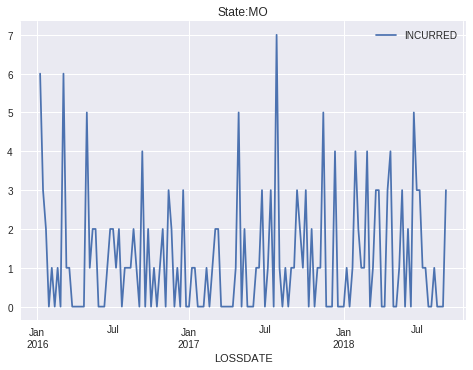

            INCURRED
LOSSDATE            
2016-06-26         3
2016-07-03         0
2016-07-10         2
2016-07-17         0
2016-07-24         0


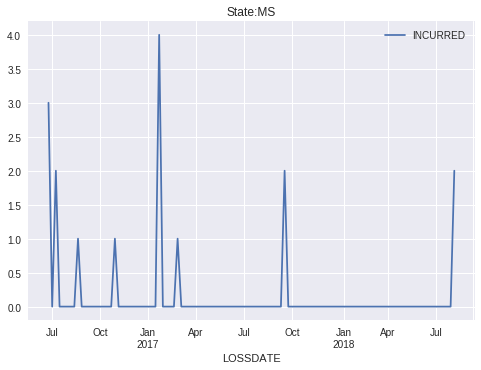

            INCURRED
LOSSDATE            
2016-02-28         1
2016-03-06         0
2016-03-13         0
2016-03-20         0
2016-03-27         1


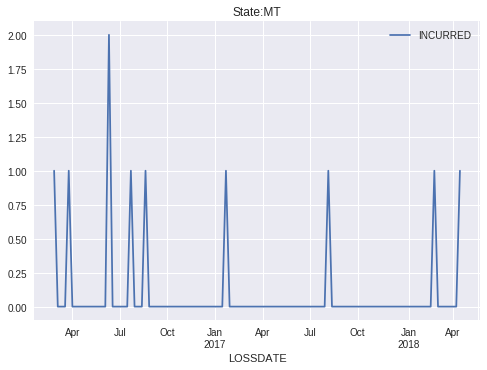

            INCURRED
LOSSDATE            
2016-01-10         1
2016-01-17         0
2016-01-24         0
2016-01-31         2
2016-02-07         1


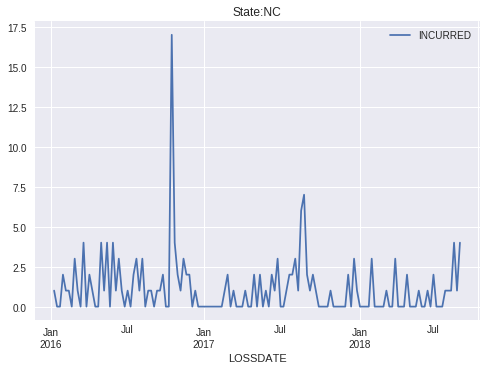

            INCURRED
LOSSDATE            
2017-01-08         2
2017-01-15         0
2017-01-22         0
2017-01-29         0
2017-02-05         0


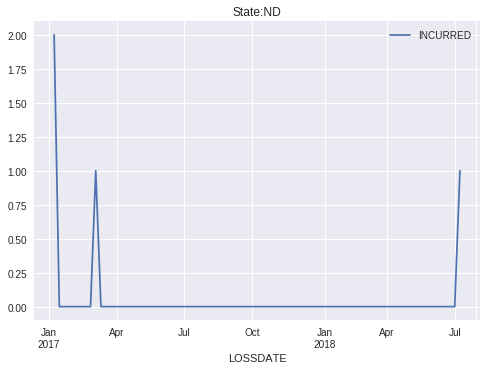

            INCURRED
LOSSDATE            
2016-03-06         2
2016-03-13         0
2016-03-20         0
2016-03-27         0
2016-04-03         0


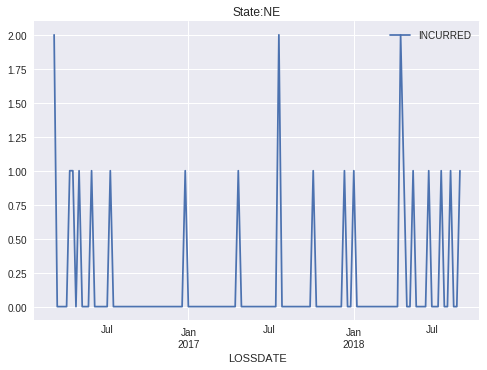

            INCURRED
LOSSDATE            
2016-02-14         1
2016-02-21         0
2016-02-28         0
2016-03-06         0
2016-03-13         0


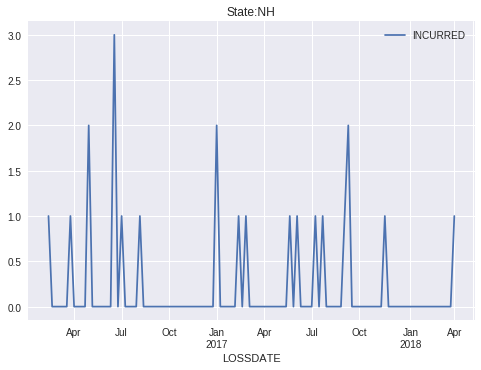

            INCURRED
LOSSDATE            
2016-01-17         1
2016-01-24         2
2016-01-31         2
2016-02-07         1
2016-02-14         0


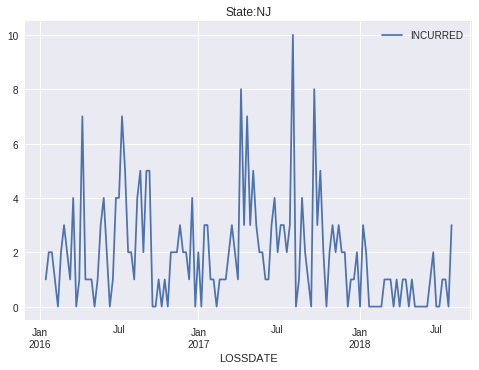

            INCURRED
LOSSDATE            
2016-03-13         1
2016-03-20         0
2016-03-27         0
2016-04-03         0
2016-04-10         0


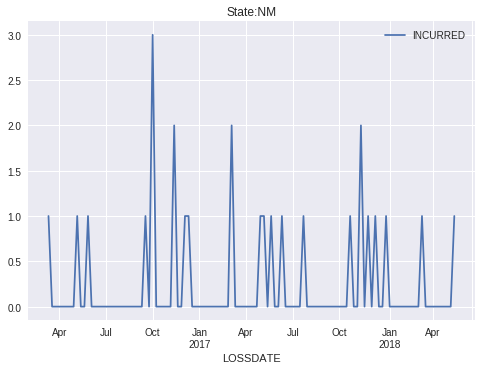

            INCURRED
LOSSDATE            
2016-01-10         2
2016-01-17         0
2016-01-24         1
2016-01-31         0
2016-02-07         0


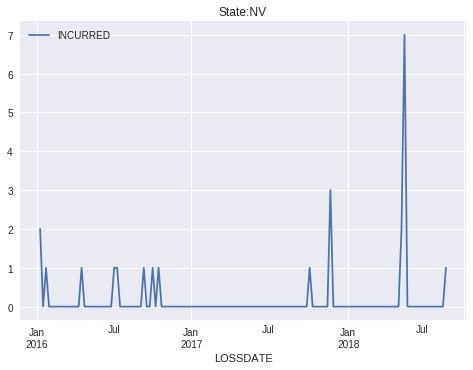

            INCURRED
LOSSDATE            
2016-01-10         6
2016-01-17         8
2016-01-24        11
2016-01-31        10
2016-02-07         6


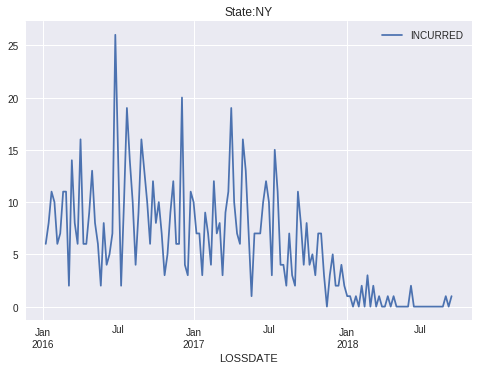

            INCURRED
LOSSDATE            
2016-01-17         1
2016-01-24         0
2016-01-31         7
2016-02-07         0
2016-02-14         1


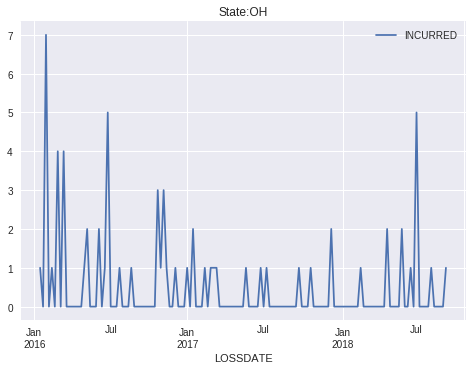

            INCURRED
LOSSDATE            
2016-01-24         1
2016-01-31         0
2016-02-07         0
2016-02-14         0
2016-02-21         0


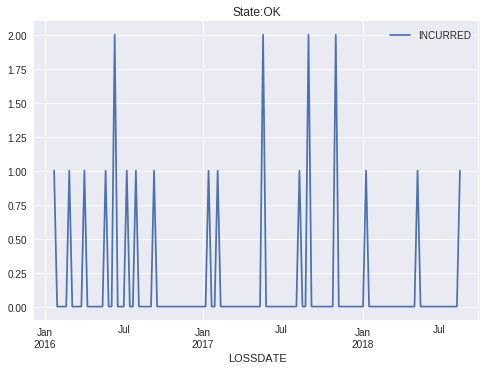

            INCURRED
LOSSDATE            
2016-01-10         9
2016-01-17         0
2016-01-24         0
2016-01-31         1
2016-02-07         0


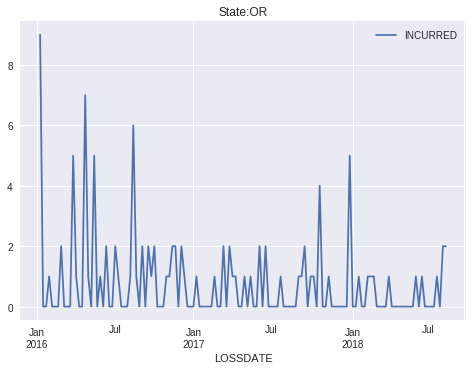

            INCURRED
LOSSDATE            
2016-01-10         1
2016-01-17         0
2016-01-24         0
2016-01-31         1
2016-02-07         3


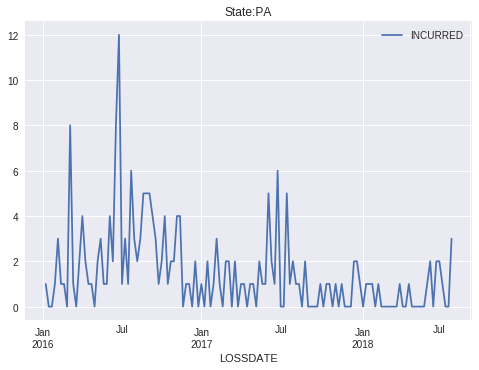

            INCURRED
LOSSDATE            
2016-03-06         1
2016-03-13         0
2016-03-20         0
2016-03-27         0
2016-04-03         0


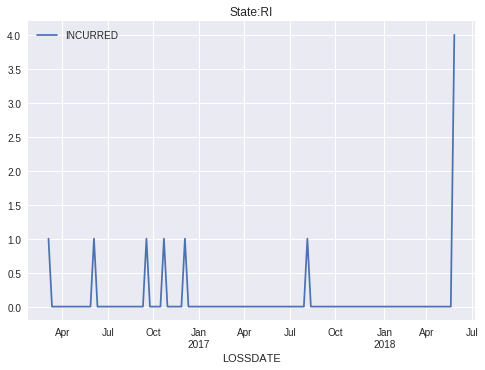

            INCURRED
LOSSDATE            
2016-01-31         1
2016-02-07         3
2016-02-14         0
2016-02-21         0
2016-02-28         0


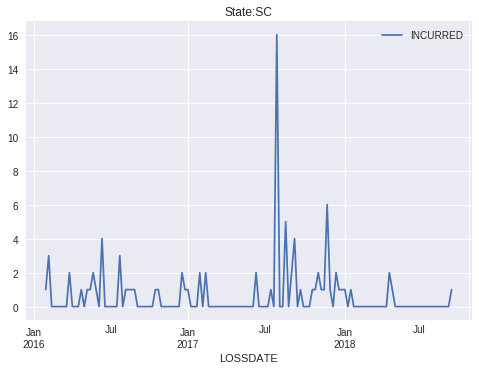

Empty DataFrame
Columns: [INCURRED]
Index: []
            INCURRED
LOSSDATE            
2016-01-03         1
2016-01-10         0
2016-01-17         0
2016-01-24         0
2016-01-31         0


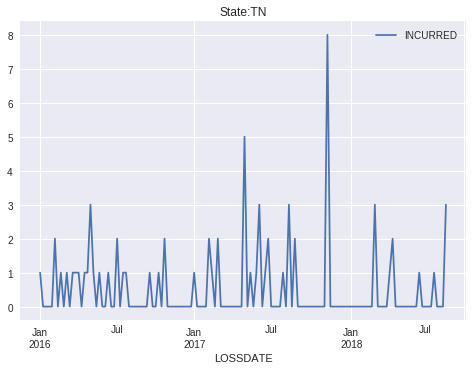

            INCURRED
LOSSDATE            
2016-01-03         5
2016-01-10         7
2016-01-17         8
2016-01-24         5
2016-01-31         2


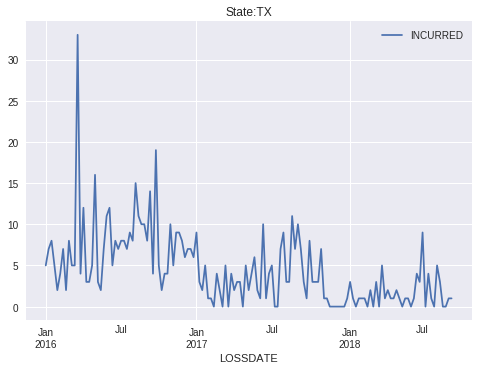

            INCURRED
LOSSDATE            
2016-01-10         1
2016-01-17         0
2016-01-24         2
2016-01-31         0
2016-02-07         0


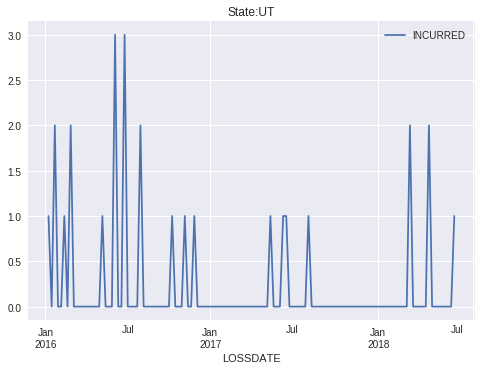

            INCURRED
LOSSDATE            
2016-01-10         2
2016-01-17         0
2016-01-24         3
2016-01-31         6
2016-02-07         1


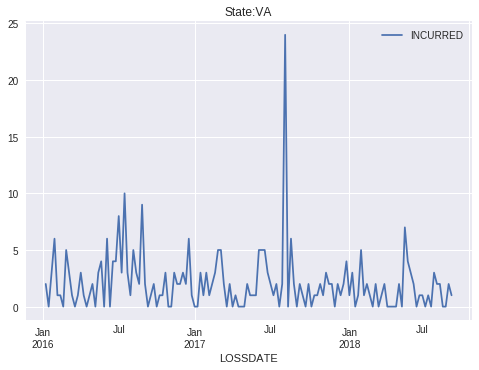

            INCURRED
LOSSDATE            
2016-05-15         1
2016-05-22         0
2016-05-29         0
2016-06-05         0
2016-06-12         0


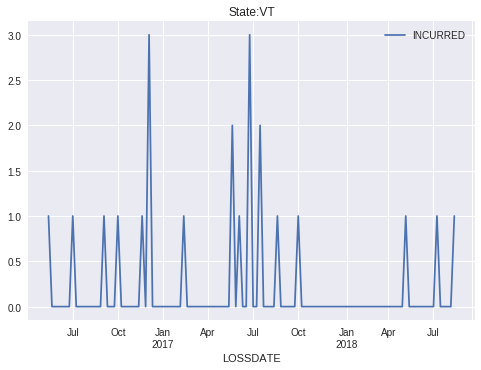

            INCURRED
LOSSDATE            
2016-01-10         2
2016-01-17         1
2016-01-24         0
2016-01-31         2
2016-02-07         1


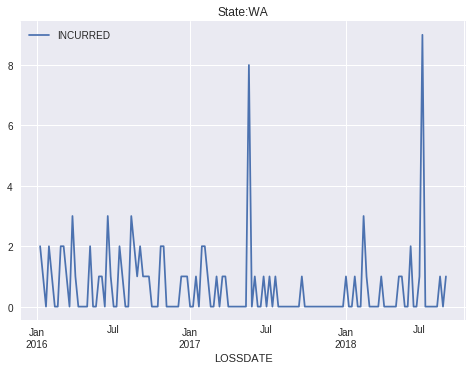

            INCURRED
LOSSDATE            
2016-02-28         1
2016-03-06         0
2016-03-13         0
2016-03-20         1
2016-03-27         0


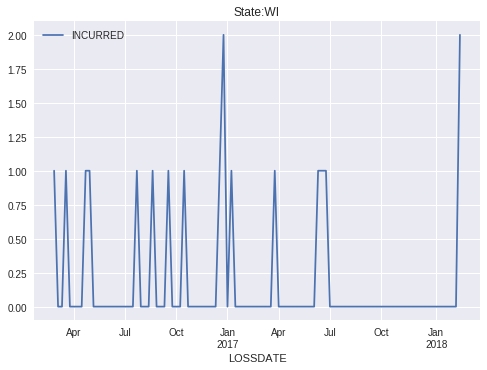

            INCURRED
LOSSDATE            
2016-07-17         1
2016-07-24         0
2016-07-31         0
2016-08-07         0
2016-08-14         2


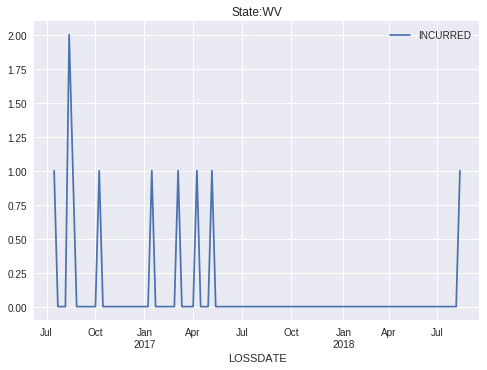

            INCURRED
LOSSDATE            
2016-08-07         1
2016-08-14         0
2016-08-21         0
2016-08-28         0
2016-09-04         0


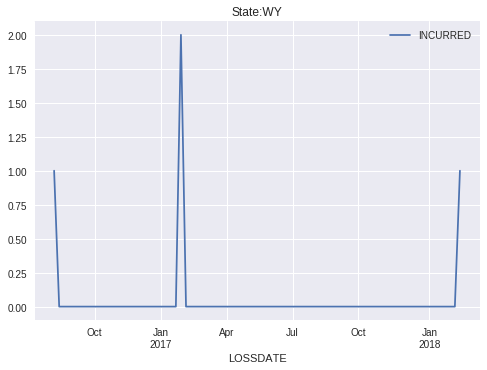

In [0]:
frame.set_index('LOSSDATE',inplace=True)
frame = frame.sort_index()
frame = frame['2016':]
for state in state_list:
  frame_state = frame.loc[frame['LOCSTATE'] == state]
  frame_state = frame_state.drop('LOCSTATE', 1)
  frame_state = frame_state.resample('W', how={'INCURRED':'count'})
  print(frame_state.head(5))
  if not frame_state.empty:
    frame_state.plot()
    plt.title("State:"+state)
    plt.show()



In [0]:
frame

INCURRED LOCSTATE
LOSSDATE                     
2016-01-01         0       AL
2016-01-01     36085       FL
2016-01-02         0       CA
2016-01-02    276558       KS
2016-01-02    798540       TX
2016-01-02         0       TX
2016-01-02         0       TN
2016-01-02    554349       TX
2016-01-03    227223       TX
2016-01-03         0       MA
2016-01-03    596573       IL
2016-01-03    117500       TX
2016-01-04    697825       MO
2016-01-04         0       MO
2016-01-04      2400       MO
2016-01-04      1850       MO
2016-01-04    135976       TX
2016-01-04    711987       MI
2016-01-04   2143200       TX
2016-01-04    697813       TX
2016-01-04    244759       VA
2016-01-04     38555       WA
2016-01-05    429955       OR
2016-01-05     32850       MN
2016-01-05   3000000       NV
2016-01-05     84410       OR
2016-01-05      1200       OR
2016-01-05      5800       WA
2016-01-05         0       NV
2016-01-05    573300       MO
...              ...      ...
2018-08-31    500000       CA
2018-08-31   2250000       CA
2018-08-31   1020000       NC
2018-09-01   1070000       VA
2018-09-04       100       CA
2018-09-05       100       OH
2018-09-06    535000       MA
2018-09-06     20100       CA
2018-09-06    875000       AZ
2018-09-07     59412       IL
2018-09-07     20100       CA
2018-09-07         0       CA
2018-09-07     25100       VA
2018-09-07   2005000       TX
2018-09-08       100       CA
2018-09-08    468500       CA
2018-09-08       100       MO
2018-09-08       100       MO
2018-09-08    435000       MO
2018-09-10     35100       CA
2018-09-10    535000       CA
2018-09-11       100       IN
2018-09-11    509940       CA
2018-09-11   1150000       IN
2018-09-11       100       NY
2018-09-13    235000       SC
2018-09-14    210000       KS
2018-09-17       100      NaN
2018-09-17       100       GA
2018-09-20    385000       CA

[6606 rows x 2 columns]

In [0]:
md = frame.loc[frame['LOCSTATE'] == 'MD']
md = md.drop('LOCSTATE', 1)
md = md.resample('W', how={'INCURRED':'count'})

mi = frame.loc[frame['LOCSTATE'] == 'MI']
mi = mi.drop('LOCSTATE', 1)
mi = mi.resample('W', how={'INCURRED':'count'})

mo = frame.loc[frame['LOCSTATE'] == 'MO']
mo = mo.drop('LOCSTATE', 1)
mo = mo.resample('W', how={'INCURRED':'count'})

nc = frame.loc[frame['LOCSTATE'] == 'NC']
nc = nc.drop('LOCSTATE', 1)
nc = nc.resample('W', how={'INCURRED':'count'})

nj = frame.loc[frame['LOCSTATE'] == 'NJ']
nj = nj.drop('LOCSTATE', 1)
nj = nj.resample('W', how={'INCURRED':'count'})

ore = frame.loc[frame['LOCSTATE'] == 'OR']
ore = ore.drop('LOCSTATE', 1)
ore = ore.resample('W', how={'INCURRED':'count'})

pa = frame.loc[frame['LOCSTATE'] == 'PA']
pa = pa.drop('LOCSTATE', 1)
pa = pa.resample('W', how={'INCURRED':'count'})

tn = frame.loc[frame['LOCSTATE'] == 'TN']
tn = tn.drop('LOCSTATE', 1)
tn = tn.resample('W', how={'INCURRED':'count'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
/us

In [0]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]
#52 for 52 weeks

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 52)
SARIMAX: (0, 0, 1) x (0, 1, 0, 52)
SARIMAX: (0, 1, 0) x (0, 1, 1, 52)
SARIMAX: (0, 1, 0) x (1, 0, 0, 52)


In [0]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(md,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
                                                                                                                                                                         
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


ARIMA(0, 0, 0)x(1, 0, 0, 52)12 - AIC:327.37436334469714
ARIMA(0, 0, 0)x(1, 1, 0, 52)12 - AIC:132.99749828433184
ARIMA(0, 0, 1)x(0, 0, 0, 52)12 - AIC:557.98087153321
ARIMA(0, 0, 1)x(0, 1, 0, 52)12 - AIC:389.0191777178364
ARIMA(0, 0, 1)x(1, 0, 0, 52)12 - AIC:325.37960317604046
ARIMA(0, 0, 1)x(1, 1, 0, 52)12 - AIC:133.68194227662582
ARIMA(0, 1, 0)x(1, 0, 0, 52)12 - AIC:345.0756549783608
ARIMA(0, 1, 0)x(1, 1, 0, 52)12 - AIC:142.78433526846501
ARIMA(0, 1, 1)x(0, 0, 0, 52)12 - AIC:519.4861519533079
ARIMA(0, 1, 1)x(0, 1, 0, 52)12 - AIC:386.2244084781607
ARIMA(0, 1, 1)x(1, 0, 0, 52)12 - AIC:303.5241432018674
ARIMA(0, 1, 1)x(1, 1, 0, 52)12 - AIC:133.23602047183778
ARIMA(1, 0, 0)x(0, 0, 0, 52)12 - AIC:555.1248084453437
ARIMA(1, 0, 0)x(0, 1, 0, 52)12 - AIC:392.6956972813165
ARIMA(1, 0, 0)x(1, 0, 0, 52)12 - AIC:320.2809266352716
ARIMA(1, 0, 0)x(1, 1, 0, 52)12 - AIC:130.25099305389006
ARIMA(1, 0, 1)x(0, 0, 0, 52)12 - AIC:523.5436975651903
ARIMA(1, 0, 1)x(0, 1, 0, 52)12 - AIC:388.570793996906
ARIMA(

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 52)12 - AIC:130.6112897403557
ARIMA(1, 1, 0)x(0, 0, 0, 52)12 - AIC:572.3505760807016
ARIMA(1, 1, 0)x(0, 1, 0, 52)12 - AIC:426.0475878225109
ARIMA(1, 1, 0)x(1, 0, 0, 52)12 - AIC:325.5349368104469
ARIMA(1, 1, 0)x(1, 1, 0, 52)12 - AIC:137.9850300655911
ARIMA(1, 1, 1)x(0, 0, 0, 52)12 - AIC:520.7999228480577
ARIMA(1, 1, 1)x(0, 1, 0, 52)12 - AIC:388.15569348594084
ARIMA(1, 1, 1)x(1, 0, 0, 52)12 - AIC:302.3386569278205
ARIMA(1, 1, 1)x(1, 1, 0, 52)12 - AIC:130.78810193655306


In [0]:
mod = sm.tsa.statespace.SARIMAX(md,order=(1, 0, 0),seasonal_order=(1, 1, 0, 52),enforce_stationarity=False,enforce_invertibility=False)
                                                                                                                               
results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2087      0.242      0.862      0.389      -0.266       0.683
ar.S.L52      -0.3744      0.085     -4.399      0.000      -0.541      -0.208
sigma2         2.8433      0.732      3.883      0.000       1.408       4.279


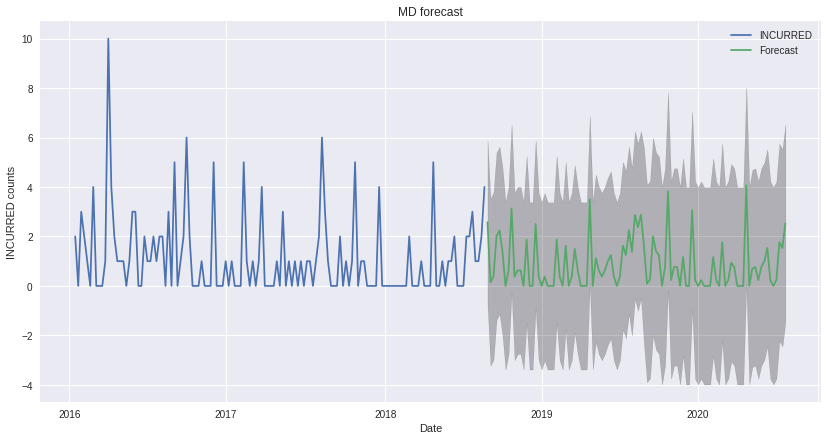

In [0]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = md.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.25)
                               
ax.set_xlabel('Date')
ax.set_ylabel('INCURRED counts')
plt.title("MD forecast")
plt.legend()
plt.show()

In [0]:
import statsmodels.api as sm
def ARIMA_best(STAT):
  for param in pdq:
      for param_seasonal in seasonal_pdq:
          try:
              mod = sm.tsa.statespace.SARIMAX(STAT,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)

              results = mod.fit()

              print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
          except:
              continue
              
def final_results(STAT, param_array):
  mod = sm.tsa.statespace.SARIMAX(STAT,order=(param_array[0], param_array[1], param_array[2]),seasonal_order=(param_array[3], param_array[4], param_array[5], 52),enforce_stationarity=False,enforce_invertibility=False)

  results = mod.fit()
  return results


def plot_forecast(STAT, results, plot_title):
  pred_uc = results.get_forecast(steps=100)
  pred_ci = pred_uc.conf_int()

  ax = STAT.plot(label='observed', figsize=(14, 7))
  pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
  ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.25)

  ax.set_xlabel('Date')
  ax.set_ylabel('INCURRED counts')
  plt.title(plot_title)
  plt.legend()
  plt.show()

In [0]:
ARIMA_best(mi)

ARIMA(0, 0, 0)x(1, 0, 0, 52)12 - AIC:398.71775278883814
ARIMA(0, 0, 0)x(1, 1, 0, 52)12 - AIC:156.63489633947475
ARIMA(0, 0, 1)x(0, 0, 0, 52)12 - AIC:687.322201240207
ARIMA(0, 0, 1)x(0, 1, 0, 52)12 - AIC:435.9182906049348
ARIMA(0, 0, 1)x(1, 0, 0, 52)12 - AIC:400.5960829929515
ARIMA(0, 0, 1)x(1, 1, 0, 52)12 - AIC:151.44153342847335
ARIMA(0, 1, 0)x(1, 0, 0, 52)12 - AIC:404.3219510734097
ARIMA(0, 1, 0)x(1, 1, 0, 52)12 - AIC:147.12283515319888
ARIMA(0, 1, 1)x(0, 0, 0, 52)12 - AIC:588.6841551918621
ARIMA(0, 1, 1)x(0, 1, 0, 52)12 - AIC:430.68583758530974
ARIMA(0, 1, 1)x(1, 0, 0, 52)12 - AIC:353.50252082411123
ARIMA(0, 1, 1)x(1, 1, 0, 52)12 - AIC:139.17422749234905
ARIMA(1, 0, 0)x(0, 0, 0, 52)12 - AIC:665.2964661370511
ARIMA(1, 0, 0)x(0, 1, 0, 52)12 - AIC:439.4317549611086
ARIMA(1, 0, 0)x(1, 0, 0, 52)12 - AIC:394.71608077974594
ARIMA(1, 0, 0)x(1, 1, 0, 52)12 - AIC:141.6273743226115
ARIMA(1, 0, 1)x(0, 0, 0, 52)12 - AIC:597.6467960658723
ARIMA(1, 0, 1)x(0, 1, 0, 52)12 - AIC:431.36556292764595
AR

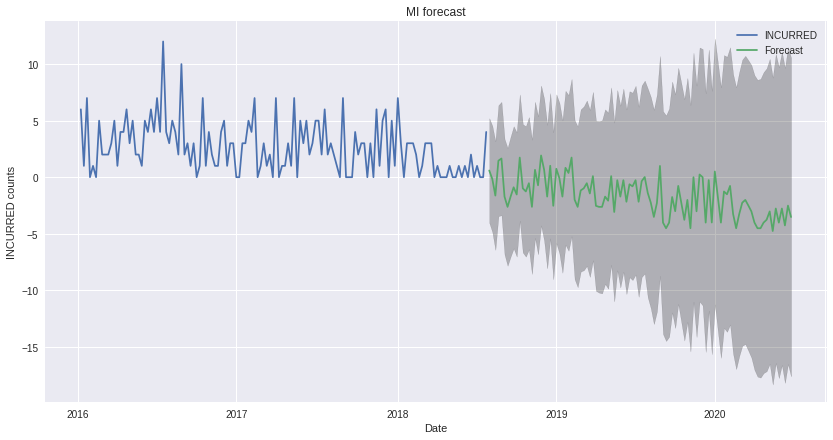

In [0]:
results = final_results(mi, [1,1,1,1,1,0])
plot_forecast(mi, results, "MI forecast")

In [0]:
ARIMA_best(mo)

ARIMA(0, 0, 0)x(1, 0, 0, 52)12 - AIC:342.1006155799285
ARIMA(0, 0, 0)x(1, 1, 0, 52)12 - AIC:147.02010461536233
ARIMA(0, 0, 1)x(0, 0, 0, 52)12 - AIC:559.9568471417488
ARIMA(0, 0, 1)x(0, 1, 0, 52)12 - AIC:346.1662642123428
ARIMA(0, 0, 1)x(1, 0, 0, 52)12 - AIC:343.29467636564453
ARIMA(0, 0, 1)x(1, 1, 0, 52)12 - AIC:147.58844611295905
ARIMA(0, 1, 0)x(1, 0, 0, 52)12 - AIC:381.48964340109967
ARIMA(0, 1, 0)x(1, 1, 0, 52)12 - AIC:156.19209077606453
ARIMA(0, 1, 1)x(0, 0, 0, 52)12 - AIC:502.5074071152308
ARIMA(0, 1, 1)x(0, 1, 0, 52)12 - AIC:351.97830431805636
ARIMA(0, 1, 1)x(1, 0, 0, 52)12 - AIC:325.2084411386571
ARIMA(0, 1, 1)x(1, 1, 0, 52)12 - AIC:149.04938683364415
ARIMA(1, 0, 0)x(0, 0, 0, 52)12 - AIC:555.524902251593
ARIMA(1, 0, 0)x(0, 1, 0, 52)12 - AIC:350.6345311099745
ARIMA(1, 0, 0)x(1, 0, 0, 52)12 - AIC:338.1383122699917
ARIMA(1, 0, 0)x(1, 1, 0, 52)12 - AIC:137.7318187511688
ARIMA(1, 0, 1)x(0, 0, 0, 52)12 - AIC:507.58256945499704
ARIMA(1, 0, 1)x(0, 1, 0, 52)12 - AIC:346.61695999809143
AR

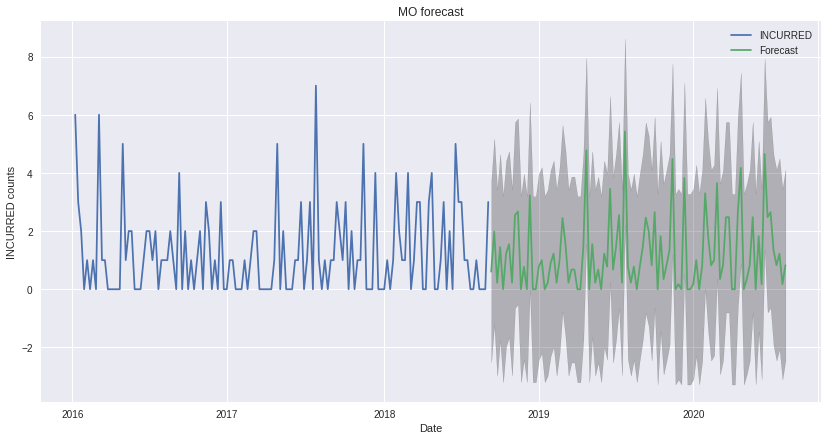

In [0]:
results = final_results(mo, [1,0,0,1,1,0])
plot_forecast(mo, results, "MO forecast")

In [0]:
ARIMA_best(nc)

ARIMA(0, 0, 0)x(1, 0, 0, 52)12 - AIC:321.972602256398
ARIMA(0, 0, 0)x(1, 1, 0, 52)12 - AIC:131.099573886474
ARIMA(0, 0, 1)x(0, 0, 0, 52)12 - AIC:600.5877267153396
ARIMA(0, 0, 1)x(0, 1, 0, 52)12 - AIC:401.91344213203405
ARIMA(0, 0, 1)x(1, 0, 0, 52)12 - AIC:313.3893633082825
ARIMA(0, 0, 1)x(1, 1, 0, 52)12 - AIC:132.7685455431518
ARIMA(0, 1, 0)x(1, 0, 0, 52)12 - AIC:326.269432890097
ARIMA(0, 1, 0)x(1, 1, 0, 52)12 - AIC:153.77508323870924
ARIMA(0, 1, 1)x(0, 0, 0, 52)12 - AIC:571.2759778019181
ARIMA(0, 1, 1)x(0, 1, 0, 52)12 - AIC:402.20935937693645
ARIMA(0, 1, 1)x(1, 0, 0, 52)12 - AIC:297.2819213887569
ARIMA(0, 1, 1)x(1, 1, 0, 52)12 - AIC:129.92201667875702
ARIMA(1, 0, 0)x(0, 0, 0, 52)12 - AIC:597.1746222658824
ARIMA(1, 0, 0)x(0, 1, 0, 52)12 - AIC:404.78928115485
ARIMA(1, 0, 0)x(1, 0, 0, 52)12 - AIC:304.13383125549944
ARIMA(1, 0, 0)x(1, 1, 0, 52)12 - AIC:129.9358721365806
ARIMA(1, 0, 1)x(0, 0, 0, 52)12 - AIC:576.3616380586095
ARIMA(1, 0, 1)x(0, 1, 0, 52)12 - AIC:402.00862477443576
ARIMA(1, 

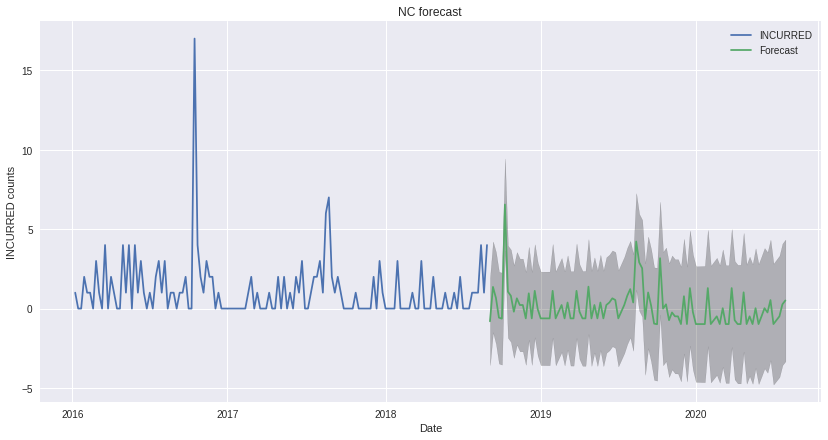

In [0]:
results = final_results(nc, [1,1,1,1,1,0])
plot_forecast(nc, results, "NC forecast")

In [0]:
ARIMA_best(nj)

ARIMA(0, 0, 0)x(1, 0, 0, 52)12 - AIC:368.03921229364244
ARIMA(0, 0, 0)x(1, 1, 0, 52)12 - AIC:141.60023947207415
ARIMA(0, 0, 1)x(0, 0, 0, 52)12 - AIC:604.9710562152959
ARIMA(0, 0, 1)x(0, 1, 0, 52)12 - AIC:385.65862684343233
ARIMA(0, 0, 1)x(1, 0, 0, 52)12 - AIC:360.54727135236783
ARIMA(0, 0, 1)x(1, 1, 0, 52)12 - AIC:136.3424626519864
ARIMA(0, 1, 0)x(1, 0, 0, 52)12 - AIC:372.681681572167
ARIMA(0, 1, 0)x(1, 1, 0, 52)12 - AIC:131.48088975284816
ARIMA(0, 1, 1)x(0, 0, 0, 52)12 - AIC:534.4664788794604
ARIMA(0, 1, 1)x(0, 1, 0, 52)12 - AIC:376.23539872875165
ARIMA(0, 1, 1)x(1, 0, 0, 52)12 - AIC:331.7187277044372
ARIMA(0, 1, 1)x(1, 1, 0, 52)12 - AIC:116.58637936615439
ARIMA(1, 0, 0)x(0, 0, 0, 52)12 - AIC:580.1571208285261
ARIMA(1, 0, 0)x(0, 1, 0, 52)12 - AIC:386.08681778636105
ARIMA(1, 0, 0)x(1, 0, 0, 52)12 - AIC:349.60610022049497
ARIMA(1, 0, 0)x(1, 1, 0, 52)12 - AIC:127.8138991898493
ARIMA(1, 0, 1)x(0, 0, 0, 52)12 - AIC:539.2481182829736
ARIMA(1, 0, 1)x(0, 1, 0, 52)12 - AIC:381.3857175087555
AR

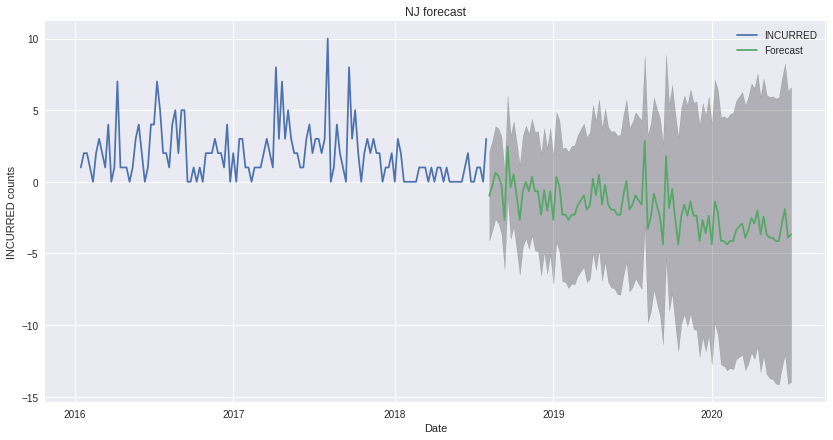

In [0]:
results = final_results(nj, [1,1,1,1,1,0])
plot_forecast(nj, results, "NJ forecast")

In [0]:
ARIMA_best(ore)

ARIMA(0, 0, 0)x(1, 0, 0, 52)12 - AIC:240.90371233703155
ARIMA(0, 0, 0)x(1, 1, 0, 52)12 - AIC:86.605120425776
ARIMA(0, 0, 1)x(0, 0, 0, 52)12 - AIC:474.71465422115796
ARIMA(0, 0, 1)x(0, 1, 0, 52)12 - AIC:319.4683801986629
ARIMA(0, 0, 1)x(1, 0, 0, 52)12 - AIC:242.53959456632748
ARIMA(0, 0, 1)x(1, 1, 0, 52)12 - AIC:87.98302367579802
ARIMA(0, 1, 0)x(1, 0, 0, 52)12 - AIC:286.18298199516096
ARIMA(0, 1, 0)x(1, 1, 0, 52)12 - AIC:97.24489151075255
ARIMA(0, 1, 1)x(0, 0, 0, 52)12 - AIC:441.1475115337903
ARIMA(0, 1, 1)x(0, 1, 0, 52)12 - AIC:321.87975872827974
ARIMA(0, 1, 1)x(1, 0, 0, 52)12 - AIC:227.20508668125996
ARIMA(0, 1, 1)x(1, 1, 0, 52)12 - AIC:82.9220174847453
ARIMA(1, 0, 0)x(0, 0, 0, 52)12 - AIC:477.26005351371373
ARIMA(1, 0, 0)x(0, 1, 0, 52)12 - AIC:322.31118189842596
ARIMA(1, 0, 0)x(1, 0, 0, 52)12 - AIC:240.49187333430748
ARIMA(1, 0, 0)x(1, 1, 0, 52)12 - AIC:83.03284303452865
ARIMA(1, 0, 1)x(0, 0, 0, 52)12 - AIC:442.30195416663094
ARIMA(1, 0, 1)x(0, 1, 0, 52)12 - AIC:321.4594177941878
ARI

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 52)12 - AIC:85.20924048674166
ARIMA(1, 1, 0)x(0, 0, 0, 52)12 - AIC:508.7134654819682
ARIMA(1, 1, 0)x(0, 1, 0, 52)12 - AIC:355.25416944669945
ARIMA(1, 1, 0)x(1, 0, 0, 52)12 - AIC:252.25477379220013
ARIMA(1, 1, 0)x(1, 1, 0, 52)12 - AIC:81.70377730772924
ARIMA(1, 1, 1)x(0, 0, 0, 52)12 - AIC:440.74119208075285
ARIMA(1, 1, 1)x(0, 1, 0, 52)12 - AIC:323.8313969455541
ARIMA(1, 1, 1)x(1, 0, 0, 52)12 - AIC:226.16762671024986
ARIMA(1, 1, 1)x(1, 1, 0, 52)12 - AIC:82.72026075182478


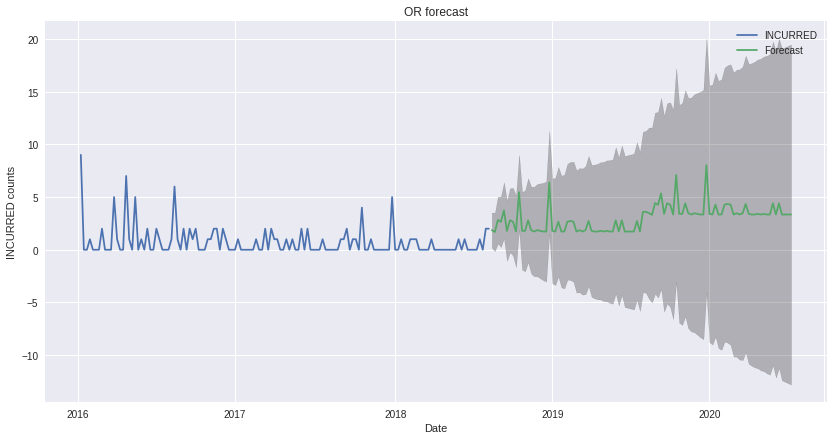

In [0]:
results = final_results(ore, [1,1,0,1,1,0])
plot_forecast(ore, results, "OR forecast")

In [0]:
ARIMA_best(pa)

ARIMA(0, 0, 0)x(1, 0, 0, 52)12 - AIC:261.8988117721558
ARIMA(0, 0, 0)x(1, 1, 0, 52)12 - AIC:123.88165646636944
ARIMA(0, 0, 1)x(0, 0, 0, 52)12 - AIC:577.7098962428086
ARIMA(0, 0, 1)x(0, 1, 0, 52)12 - AIC:363.04614158509855
ARIMA(0, 0, 1)x(1, 0, 0, 52)12 - AIC:263.7024452567442
ARIMA(0, 0, 1)x(1, 1, 0, 52)12 - AIC:125.78678573523163
ARIMA(0, 1, 0)x(1, 0, 0, 52)12 - AIC:311.5552912882322
ARIMA(0, 1, 0)x(1, 1, 0, 52)12 - AIC:136.88398129674152
ARIMA(0, 1, 1)x(0, 0, 0, 52)12 - AIC:521.4986043167582
ARIMA(0, 1, 1)x(0, 1, 0, 52)12 - AIC:345.38820348201085
ARIMA(0, 1, 1)x(1, 0, 0, 52)12 - AIC:256.8916614032487
ARIMA(0, 1, 1)x(1, 1, 0, 52)12 - AIC:117.97398543194956
ARIMA(1, 0, 0)x(0, 0, 0, 52)12 - AIC:562.7277987767168
ARIMA(1, 0, 0)x(0, 1, 0, 52)12 - AIC:366.16038976621587
ARIMA(1, 0, 0)x(1, 0, 0, 52)12 - AIC:261.46708171417606
ARIMA(1, 0, 0)x(1, 1, 0, 52)12 - AIC:122.82488892443082
ARIMA(1, 0, 1)x(0, 0, 0, 52)12 - AIC:525.9808995923424
ARIMA(1, 0, 1)x(0, 1, 0, 52)12 - AIC:350.56775193635184


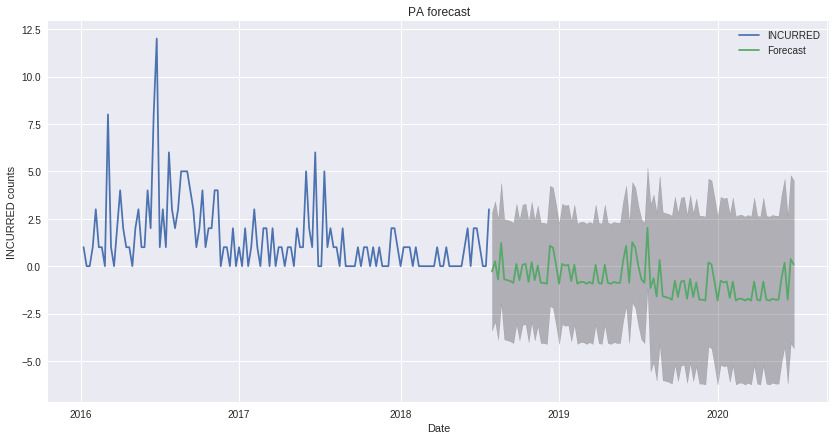

In [0]:
results = final_results(pa, [1,1,1,1,1,0])
plot_forecast(pa, results, "PA forecast")

In [0]:
ARIMA_best(tn)

ARIMA(0, 0, 0)x(1, 0, 0, 52)12 - AIC:295.58435898088834
ARIMA(0, 0, 0)x(1, 1, 0, 52)12 - AIC:108.08254323536543
ARIMA(0, 0, 1)x(0, 0, 0, 52)12 - AIC:433.64752095699527
ARIMA(0, 0, 1)x(0, 1, 0, 52)12 - AIC:318.17988288538635
ARIMA(0, 0, 1)x(1, 0, 0, 52)12 - AIC:297.58382462471275
ARIMA(0, 0, 1)x(1, 1, 0, 52)12 - AIC:108.89104545020977
ARIMA(0, 1, 0)x(1, 0, 0, 52)12 - AIC:346.48254915419005
ARIMA(0, 1, 0)x(1, 1, 0, 52)12 - AIC:119.30720287920512
ARIMA(0, 1, 1)x(0, 0, 0, 52)12 - AIC:411.0606847619507
ARIMA(0, 1, 1)x(0, 1, 0, 52)12 - AIC:319.5079323105795
ARIMA(0, 1, 1)x(1, 0, 0, 52)12 - AIC:288.6698316164677
ARIMA(0, 1, 1)x(1, 1, 0, 52)12 - AIC:109.48820198391864
ARIMA(1, 0, 0)x(0, 0, 0, 52)12 - AIC:435.41769933499586
ARIMA(1, 0, 0)x(0, 1, 0, 52)12 - AIC:320.7910708158772
ARIMA(1, 0, 0)x(1, 0, 0, 52)12 - AIC:294.8344854182307
ARIMA(1, 0, 0)x(1, 1, 0, 52)12 - AIC:106.45928214001671
ARIMA(1, 0, 1)x(0, 0, 0, 52)12 - AIC:415.2001777960395
ARIMA(1, 0, 1)x(0, 1, 0, 52)12 - AIC:319.6707548147337

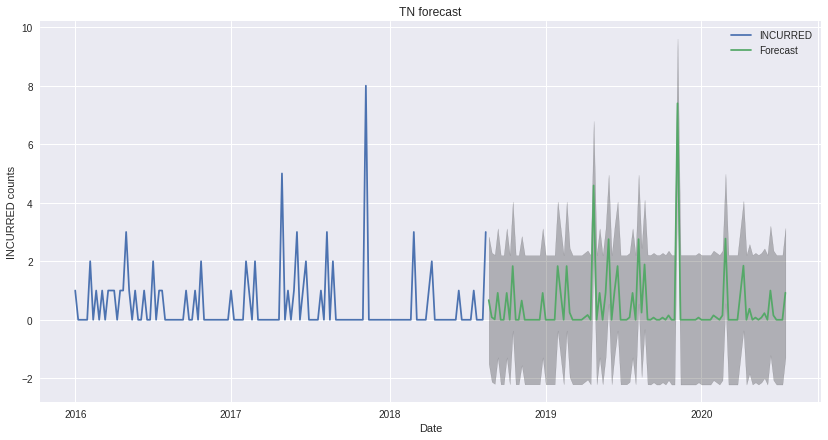

In [0]:
results = final_results(tn, [1,0,0,1,1,0])
plot_forecast(tn, results, "TN forecast")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


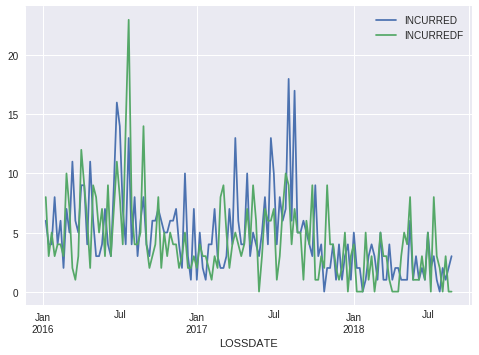

In [0]:
gen = list(vantage2['CGENDER'])
gender = []
for x in gen:
  if (isinstance(x,str) and (x == 'M' or x == 'F')):
    gender.append(x)
  else:
    gender.append(-1)
    #need to keep them aligned

data_gender = {'LOSSDATE': list_of_dates, 'INCURRED': values, 'CGENDER': gender}
data_gender = pd.DataFrame(data_gender)
#df.loc[df['column_name'] == some_value]
data_male = data_gender.loc[data_gender['CGENDER'] == 'M']
data_female = data_gender.loc[data_gender['CGENDER'] == 'F']

data_male.set_index('LOSSDATE',inplace=True)
data_female.set_index('LOSSDATE',inplace=True)

data_male = data_male.sort_index()
data_female = data_female.sort_index()

datamale_2016 = data_male['2016':]
datafemale_2016 = data_female['2016':]

count_week_2016_male = datamale_2016.resample('W',how={'INCURRED':'count'})
count_week_2016_female = datafemale_2016.resample('W',how={'INCURRED':'count'})
count_week_2016_female = count_week_2016_female[:-1]
count_week_2016_male['INCURREDF'] = list(count_week_2016_female['INCURRED'])

count_week_2016_male.plot()

In [0]:
print(len(data_male))
print(len(data_female))

2529
2096


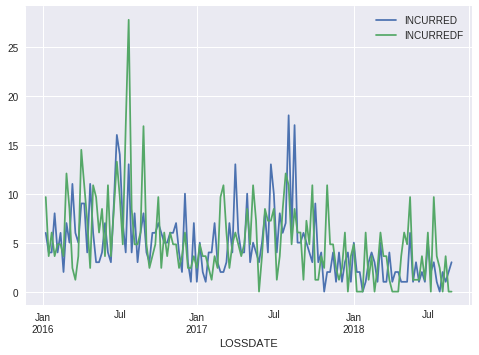

In [0]:
#making another plot that takes into account the different proportions of men and women
ratio = len(data_male)/len(data_female)
count_week_2016_male['INCURREDF'] = count_week_2016_male['INCURREDF'].multiply(ratio)
count_week_2016_male.plot()

In [0]:
count_week_2016_female

INCURRED
LOSSDATE            
2016-01-10         8
2016-01-17         3
2016-01-24         5
2016-01-31         3
2016-02-07         4
2016-02-14         4
2016-02-21         3
2016-02-28        10
2016-03-06         7
2016-03-13         2
2016-03-20         1
2016-03-27         3
2016-04-03        12
2016-04-10         9
2016-04-17         6
2016-04-24         2
2016-05-01         9
2016-05-08         8
2016-05-15         5
2016-05-22         7
2016-05-29         3
2016-06-05         9
2016-06-12         3
2016-06-19         7
2016-06-26        11
2016-07-03         8
2016-07-10         4
2016-07-17        14
2016-07-24        23
2016-07-31         7
...              ...
2018-02-04         5
2018-02-11         1
2018-02-18         3
2018-02-25         0
2018-03-04         2
2018-03-11         5
2018-03-18         3
2018-03-25         3
2018-04-01         1
2018-04-08         0
2018-04-15         0
2018-04-22         0
2018-04-29         3
2018-05-06         5
2018-05-13         4
2018-05-20         8
2018-05-27         1
2018-06-03         1
2018-06-10         1
2018-06-17         3
2018-06-24         1
2018-07-01         5
2018-07-08         0
2018-07-15         8
2018-07-22         3
2018-07-29         2
2018-08-05         0
2018-08-12         3
2018-08-19         0
2018-08-26         0

[138 rows x 1 columns]

In [0]:
data = {'LOSSDATE': list_of_dates, 'INCURRED': values, 'LOCSTATE': list(vantage2['LOCSTATE'])}
frame = pd.DataFrame(data)


ore = frame.loc[frame['LOCSTATE'] == 'OR']
ore = ore.drop('LOCSTATE', 1)
ore
#ore = ore.resample('W', how={'INCURRED':'count'})

INCURRED   LOSSDATE
461       52174 2012-01-10
553           0 2016-03-31
1185     151079 2015-06-08
1198       9500 2015-07-29
1216     396150 2015-08-18
1360     302540 2015-05-11
1370     406754 2015-05-28
1459     479453 2004-10-29
1508     270834 2015-06-24
1536     613160 2015-08-13
1581          0 2015-07-27
2747     106929 2017-06-12
2748     146296 2017-06-12
2791     740799 2017-06-01
2844     485058 2008-08-25
3131          0 2017-03-28
3227     319000 2008-06-25
3750     121600 2009-08-04
4111    1074968 2009-01-06
4169     275829 2008-10-20
4207          0 2006-07-03
4762     104574 2015-06-20
4767     313782 2015-06-22
4904     925363 2015-06-02
5133     599501 2016-11-29
5148          0 2016-09-15
5191     176680 2016-08-09
5434     873950 2016-08-08
5435     890661 2016-08-08
5436    1334701 2016-08-08
...         ...        ...
19878         0 2014-07-08
19881         0 2014-06-24
19984    133330 2011-05-26
20175    792280 2014-08-05
20176    354850 2014-08-05
20177    823173 2014-08-05
20212         0 2014-08-11
20546    156422 2014-12-04
20675         0 2012-05-19
20698    718897 2014-03-15
20771         0 2014-06-11
20887    642495 2010-08-14
20994    837638 2009-09-18
21268     35200 2017-09-11
21444    230864 2010-02-15
21465    395914 2009-12-04
22067    615000 2018-06-01
22164         0 2017-11-06
22340   1035000 2018-08-10
22341    450284 2018-08-10
22389    369216 2018-07-18
22455         0 2018-02-23
22484    201154 2018-06-11
22722     51750 2018-02-06
22723    140400 2018-02-12
22727    476414 2017-09-08
23992         0 2009-07-31
26436   1004816 2012-06-26
26437    613501 2012-06-26
27006         0 2012-11-20

[222 rows x 2 columns]

In [0]:
ore.set_index('LOSSDATE',inplace=True)
ore = ore.sort_index()

In [0]:
ore_year_count = ore.resample('A', how={'INCURRED':'count'})
ore_year_sum = ore.resample('A', how={'INCURRED':'sum'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


In [0]:
ore_year_count

INCURRED
LOSSDATE            
2004-12-31         4
2005-12-31         6
2006-12-31         8
2007-12-31         1
2008-12-31         6
2009-12-31         7
2010-12-31         7
2011-12-31         4
2012-12-31         7
2013-12-31        12
2014-12-31        31
2015-12-31        25
2016-12-31        61
2017-12-31        31
2018-12-31        12

In [0]:
ore_year_sum

INCURRED
LOSSDATE            
2004-12-31    838678
2005-12-31   1288935
2006-12-31   1681205
2007-12-31         0
2008-12-31   1830445
2009-12-31   3565542
2010-12-31   3192634
2011-12-31    781056
2012-12-31   2515201
2013-12-31   6725250
2014-12-31  16269810
2015-12-31   8594084
2016-12-31  54166831
2017-12-31  12619984
2018-12-31   5723854